# Dataset Exploration and Preprocessing

## Introduction

In this notebook, we will explore the **NASA Turbofan Engine Degradation Dataset** to gain a deeper understanding of its structure, features, and the challenges it presents. Effective data exploration and preprocessing are critical first steps in any machine learning project, especially when dealing with time-series data. By thoroughly analyzing the dataset, we can uncover meaningful insights and prepare it for predictive modeling.

### Key Characteristics of the Dataset
- **Multivariate Time-Series Data**: Each engine is represented as a sequence of sensor readings and operational settings over time.
- **No Explicit Failure Labels**: The Remaining Useful Life (RUL) must be estimated based on the degradation patterns observed in the data.
- **Varying Conditions**: Each engine operates under different conditions, adding complexity to the modeling process.

### Importance of Exploration and Preprocessing
Time-series datasets like this require careful handling to ensure the models can capture meaningful temporal patterns. Key preprocessing steps include:
- Cleaning the data to handle missing values or anomalies.
- Normalizing features to ensure comparability across sensors.
- Splitting the data into training, validation, and testing sets while preserving temporal dependencies.

## Objectives of This Notebook
1. **Understand the Dataset**:
   - Explore the structure and content of the dataset.
   - Examine the features (sensor readings and operational settings) and their relationships.
2. **Perform Exploratory Data Analysis (EDA)**:
   - Visualize degradation patterns across different engines.
   - Identify trends, anomalies, and potential outliers in the data.
3. **Preprocess the Data**:
   - Normalize and scale features to ensure they are suitable for machine learning models.
   - Create a train-validation-test split while maintaining the temporal nature of the data.
   - Address any missing values or irregularities.

By the end of this notebook, we will have a clean and well-understood dataset, ready for feature engineering and model development in the subsequent steps of the project.


# Basics of a Turbofan Engine

Understanding the basics of how turbofan engines work is crucial for interpreting the NASA Turbofan Engine Degradation Dataset. This knowledge helps in understanding the dataset's features, identifying relevant degradation patterns, and designing effective predictive models.

## What is a Turbofan Engine?

A turbofan engine is a type of jet engine widely used in commercial and military aircraft. It is designed to efficiently generate thrust by combining two key elements:
1. **Core Engine (Gas Turbine)**: Generates power by burning fuel.
2. **Bypass Fan**: Produces additional thrust by accelerating air around the engine core.

Turbofan engines are preferred for their fuel efficiency, reduced noise levels, and high thrust output.

---

## Key Components of a Turbofan Engine

### 1. **Fan**
- **Function**: The large fan at the front of the engine draws in air. A portion of the air enters the core engine, while the rest bypasses it, providing most of the engine's thrust.
- **Relevance to Dataset**: Fan degradation (e.g., wear or imbalance) can cause vibration, affecting the overall performance.

### 2. **Compressor**
- **Function**: Compresses incoming air to high pressure before it enters the combustion chamber.
- **Relevance to Dataset**:
  - Sensor readings for pressure and temperature help monitor compressor health.
  - Issues such as fouling or blade damage reduce compression efficiency.

### 3. **Combustion Chamber**
- **Function**: Combines compressed air with fuel and ignites it to produce high-energy exhaust gases.
- **Relevance to Dataset**:
  - High temperatures from combustion are monitored to prevent overheating.
  - Changes in temperature readings can indicate degradation or improper fuel mixing.

### 4. **Turbine**
- **Function**: Extracts energy from high-energy exhaust gases to drive the compressor and fan.
- **Relevance to Dataset**:
  - Turbine blade degradation (e.g., cracks or warping) impacts efficiency.
  - Temperature and pressure readings help identify turbine performance issues.

### 5. **Nozzle**
- **Function**: Expels exhaust gases at high speed, generating additional thrust.
- **Relevance to Dataset**:
  - Exhaust gas temperature (EGT) trends can indicate overall engine health.

---

## Operational Features Relevant to the Dataset

### 1. **Bypass Ratio**
- The ratio of air bypassing the core engine to air passing through it.
- High bypass ratios improve efficiency and reduce noise.

### 2. **Operating Conditions**
- Engines are exposed to varying conditions such as:
  - **Altitude**: Affects air pressure and temperature.
  - **Throttle Settings**: Influence engine stress and performance.
  - **Environmental Factors**: Debris ingestion, temperature extremes, or icing.

- The dataset includes operational settings that reflect these variables, which can affect degradation patterns.

---

## Common Degradation and Failure Modes

### 1. **Compressor Degradation**
- Causes: Fouling, erosion, or foreign object damage.
- Indicators in Dataset:
  - Gradual increase in pressure ratio inconsistencies.
  - Temperature imbalances in compressor stages.

### 2. **Turbine Blade Fatigue**
- Causes: High thermal stress, material fatigue.
- Indicators in Dataset:
  - Unusual fluctuations in exhaust gas temperature (EGT).
  - Loss of efficiency in pressure readings.

### 3. **Bearing Wear**
- Causes: Friction, lubrication failure.
- Indicators in Dataset:
  - Increasing vibration or noise levels.

### 4. **Fan Imbalance**
- Causes: Wear, damage, or dirt accumulation.
- Indicators in Dataset:
  - Increased vibration and unstable pressure readings.

---

## How This Relates to the Dataset

The NASA Turbofan Engine Degradation Dataset includes:
- **Sensor Data**: Tracks performance metrics like temperature, pressure, and vibration across multiple engine cycles.
- **Operational Settings**: Variables such as altitude, throttle levels, and operating conditions.
- **Time-Series Data**: Captures the progressive degradation of engines over time.

By understanding these key aspects of turbofan engines, we can:
1. Identify the most relevant features for predicting Remaining Useful Life (RUL).
2. Engineer features that reflect real-world degradation mechanisms.
3. Interpret model outputs in the context of engine operation and maintenance.

This foundational knowledge will guide our exploration and preprocessing of the dataset in the next steps.


# Step 1: Overview of the NASA Turbofan Engine Degradation Dataset

The NASA Turbofan Engine Degradation Dataset contains time-series data representing the degradation of multiple engines over their operational cycles. The dataset is widely used for predictive maintenance tasks, specifically for estimating the Remaining Useful Life (RUL) of components.

## Dataset Structure

### Main Components
1. **Training Dataset**: 
   - Contains complete time-series data for engines that are run until failure.
   - File: `train_FD001.txt`.

2. **Testing Dataset**: 
   - Contains partial time-series data for engines that have not yet failed.
   - File: `test_FD001.txt`.

3. **RUL File**: 
   - Specifies the Remaining Useful Life (RUL) for engines in the testing dataset.
   - File: `RUL_FD001.txt`.

---

### Columns in the Dataset
1. **Engine ID**:
   - Identifies the engine unit (e.g., 1, 2, 3).
2. **Cycle**:
   - Time-step index for each engine’s operation.
   - Starts at 1 and increases sequentially.
3. **Operational Settings**:
   - Represent different operating conditions:
     - `os_1`, `os_2`, `os_3`.
4. **Sensor Measurements**:
   - Multivariate sensor data capturing engine health metrics:
     - `sensor_1` to `sensor_21`.

---

### Target Variable
- The training dataset does not explicitly contain a target column.
- **Remaining Useful Life (RUL)**:
  - For the training dataset: Can be computed as the difference between the last cycle (failure point) and the current cycle for each engine.
  - For the testing dataset: Provided as a separate file (`RUL_FD001.txt`).

---

### File Organization
1. **Training Data**: `train_FD001.txt`
   - Full operational data for engines until failure.
2. **Testing Data**: `test_FD001.txt`
   - Partial operational data for engines that have not failed.
3. **RUL File**: `RUL_FD001.txt`
   - Remaining Useful Life (RUL) for engines in the test set.

---

### Example Rows (Tabular View)
| Engine ID | Cycle | os_1 | os_2 | os_3 | sensor_1 | sensor_2 | ... | sensor_21 |
|-----------|-------|------|------|------|----------|----------|-----|----------|
| 1         | 1     | 2.5  | 0.5  | 100  | 518.67   | 641.82   | ... | 2388.06  |
| 1         | 2     | 2.5  | 0.5  | 100  | 518.67   | 642.15   | ... | 2388.09  |
| ...       | ...   | ...  | ...  | ...  | ...      | ...      | ... | ...      |

---

### Dataset Variants
The dataset is available in four subsets based on operating conditions and fault types:
1. **FD001**: Single operating condition, single fault type.
2. **FD002**: Multiple operating conditions, single fault type.
3. **FD003**: Single operating condition, multiple fault types.
4. **FD004**: Multiple operating conditions, multiple fault types.

For simplicity, most projects start with **FD001**.



## Differences Between Train and Test Data in the NASA Turbofan Dataset

### Key Differences Between Train and Test Data

#### **1. Training Data (`train_FD001.txt`)**
- The data for each engine ends at the **failure cycle**.
- The RUL (Remaining Useful Life) for each engine is computed as:
  $$
  	ext{RUL} = 	ext{max(cycle)} - 	ext{current(cycle)}
  $$
  - At the last recorded cycle, RUL = 0, indicating that the engine has failed.

---

#### **2. Test Data (`test_FD001.txt`)**
- The data for each engine ends at a **random cycle before failure**.
  - This simulates real-world conditions where the exact failure point is unknown, but you need to predict how much life remains.
- The true Remaining Useful Life (RUL) after the last recorded cycle for each engine is provided in `RUL_FD001.txt`.
  - These values indicate how many cycles remain until the engine fails **after the last recorded cycle**.

---

### Why Is the Test Data Structured This Way?

The purpose of the test dataset is to evaluate your model's ability to predict **how much life remains (RUL)** for an engine when only partial operational data is available. This is more realistic because:

- In real-world scenarios, engines are typically monitored until a certain point, and predictions are made about their remaining life to schedule maintenance.
- The test dataset simulates this scenario by:
  - Cutting off the engine's operational data before failure.
  - Providing the true remaining cycles (RUL) in `RUL_FD001.txt` for evaluation.

---

### How to Use This Information

#### **1. Prediction Task**
- For each engine in `test_FD001.txt`, your model must predict the RUL at the last recorded cycle.

#### **2. Evaluation**
- Compare your model's predicted RUL with the true RUL values provided in `RUL_FD001.txt`.
- Use metrics like RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error) to evaluate performance.

---

### Practical Example

#### **Test Dataset Example (`test_FD001.txt`):**
| **engine_id** | **cycle** | ... |  
|---------------|-----------|-----|  
| 1             | 1         | ... |  
| 1             | 2         | ... |  
| 1             | 31        | ... |  

#### **True RUL from `RUL_FD001.txt`:**
- First line: `112`
  - Engine 1 has **112 cycles remaining** after its last recorded cycle (`cycle = 31`).

#### **Goal**:
- Use the data in `test_FD001.txt` to predict the RUL at `cycle = 31` for Engine 1.
- Compare your prediction with the ground truth from `RUL_FD001.txt`.

---

### Key Takeaways

#### **1. Training Data**
- Ends at failure (RUL = 0).
- Used to train the model to predict RUL based on operational data.

#### **2. Test Data**
- Ends before failure.
- Used to test the model’s ability to predict how many cycles remain (RUL) after the last recorded cycle.

#### **3. True RUL**
- Provided in `RUL_FD001.txt` for the last recorded cycle of each engine in the test dataset.
- Serves as the ground truth for evaluation.


## Column Descriptions for the NASA Turbofan Engine Degradation Dataset

### General Columns
1. **`engine_id`**:
   - Unique identifier for each engine in the dataset.
   - Represents an individual engine unit being monitored over time.

2. **`cycle`**:
   - A time-step index representing a single operational period for an engine.
   - Starts at 1 for each engine and increments by 1 with each operational cycle.

---

### Operational Settings
These columns describe the operating conditions during each cycle:
1. **`os_1`**:
   - Represents an operational setting (e.g., throttle or power setting).
   - Higher values may indicate higher engine load.

2. **`os_2`**:
   - Represents another operational condition, possibly related to altitude or air pressure.
   - Lower values might correspond to higher altitudes (lower air pressure).

3. **`os_3`**:
   - Represents an additional operational parameter, potentially a derived or environment-specific feature (e.g., engine load factor or ambient temperature).

---

### Sensor Readings
These columns capture measurements from various sensors monitoring the engine’s performance and health. The dataset includes 21 sensors (`sensor_1` to `sensor_21`):

#### Sensors with Known Relevance
1. **`sensor_1`**:
   - Total temperature at the fan inlet.
   - Indicates the temperature of air entering the engine.

2. **`sensor_2`**:
   - Total temperature at the low-pressure compressor (LPC) outlet.
   - Measures the temperature increase due to compression.

3. **`sensor_3`**:
   - Total temperature at the high-pressure compressor (HPC) outlet.
   - Reflects the temperature increase after further compression.

4. **`sensor_4`**:
   - Total pressure at the fan inlet.
   - Indicates the pressure of air entering the engine.

5. **`sensor_5`**:
   - Total pressure at the LPC outlet.
   - Measures the pressure increase after low-pressure compression.

6. **`sensor_6`**:
   - Total pressure at the HPC outlet.
   - Indicates the maximum pressure reached in the compression process.

7. **`sensor_7`**:
   - Physical fan speed (rotational speed of the fan blades).

8. **`sensor_8`**:
   - Physical core speed (rotational speed of the engine core).

9. **`sensor_9`**:
   - Bypass Ratio.
   - Reflects the ratio of air bypassing the core engine to air passing through it.

10. **`sensor_10`**:
    - Pressure ratio between HPC outlet and LPC outlet.
    - Indicates the effectiveness of the compression process.

#### Other Sensors
The remaining sensors provide additional data on temperatures, pressures, vibration, and flow rates. While their exact physical meaning is not explicitly defined, they collectively capture the overall operational state and degradation of the engine:
- **`sensor_11` to `sensor_21`**:
  - Include various parameters such as vibration levels, exhaust gas temperatures, and flow rates.
  - These sensors provide critical data for diagnosing faults and predicting Remaining Useful Life (RUL).

---

### Notes
- The dataset captures sensor readings for engines under similar operating conditions.
- Some sensors may show trends or abrupt changes as the engine degrades, providing clues about impending failure.

#### Using This Information
- **Feature Selection**:
  - Sensors with strong trends or correlations with `cycle` or `RUL` should be prioritized.
- **Engineering Features**:
  - Derived metrics (e.g., pressure ratios, rolling averages) can be created from these columns.
- **Interpreting Results**:
  - Understanding what each sensor measures allows for better interpretation of model outputs and insights into engine health.

Let me know if you'd like further details or help in feature engineering based on these columns!


## Visualize the dataset:

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine_id  20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   os_1       20631 non-null  float64
 3   os_2       20631 non-null  float64
 4   os_3       20631 non-null  float64
 5   sensor_1   20631 non-null  float64
 6   sensor_2   20631 non-null  float64
 7   sensor_3   20631 non-null  float64
 8   sensor_4   20631 non-null  float64
 9   sensor_5   20631 non-null  float64
 10  sensor_6   20631 non-null  float64
 11  sensor_7   20631 non-null  float64
 12  sensor_8   20631 non-null  float64
 13  sensor_9   20631 non-null  float64
 14  sensor_10  20631 non-null  float64
 15  sensor_11  20631 non-null  float64
 16  sensor_12  20631 non-null  float64
 17  sensor_13  20631 non-null  float64
 18  sensor_14  20631 non-null  float64
 19  sensor_15  20631 non-null  f

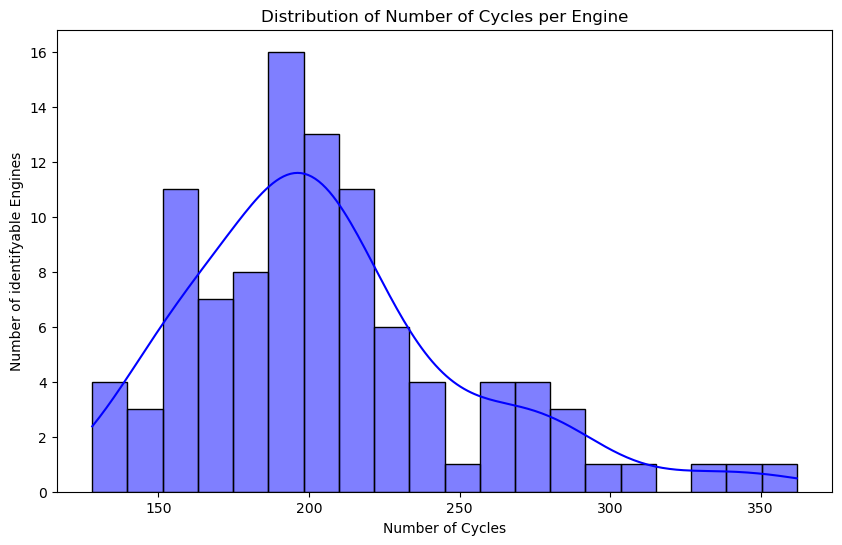

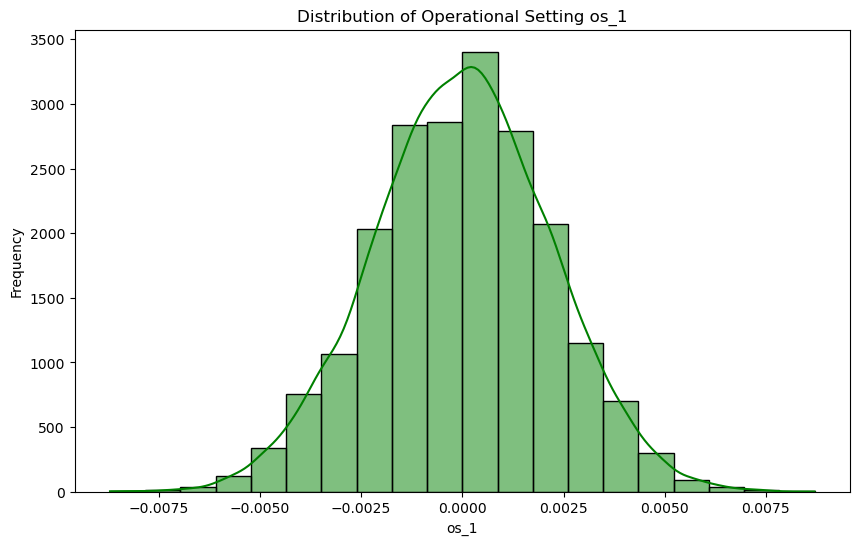

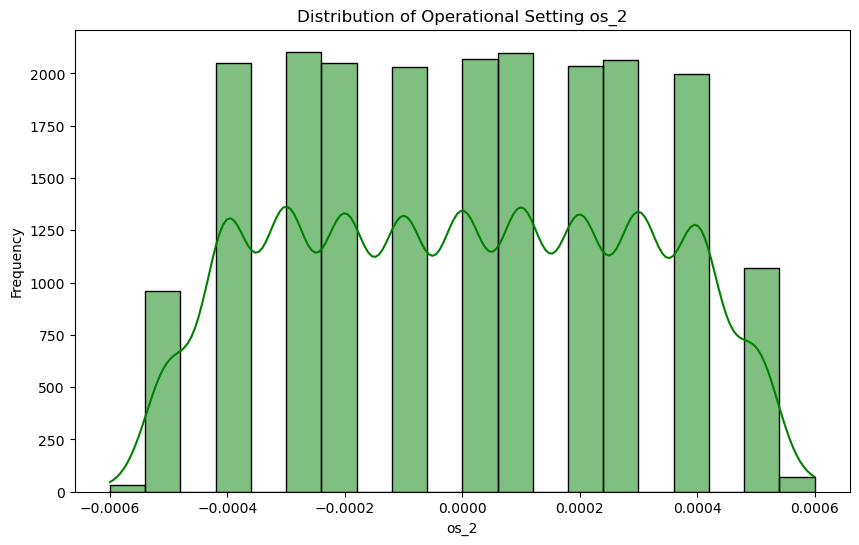

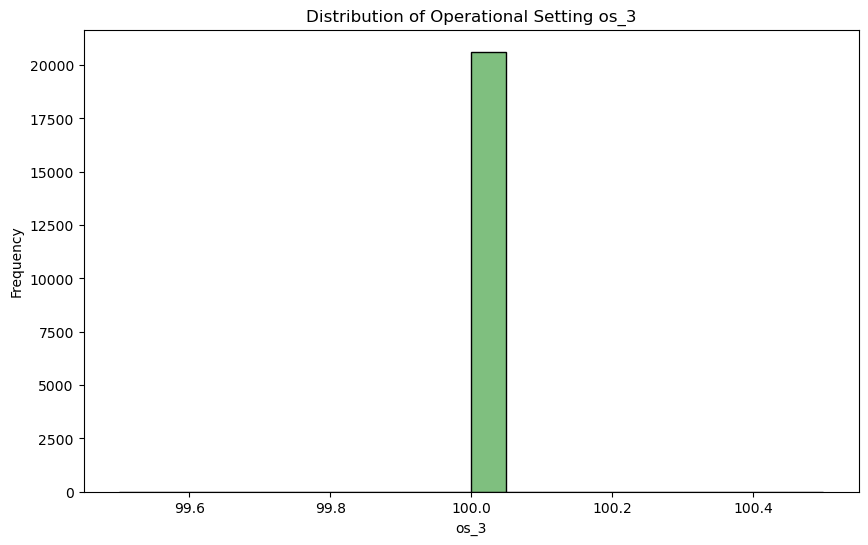

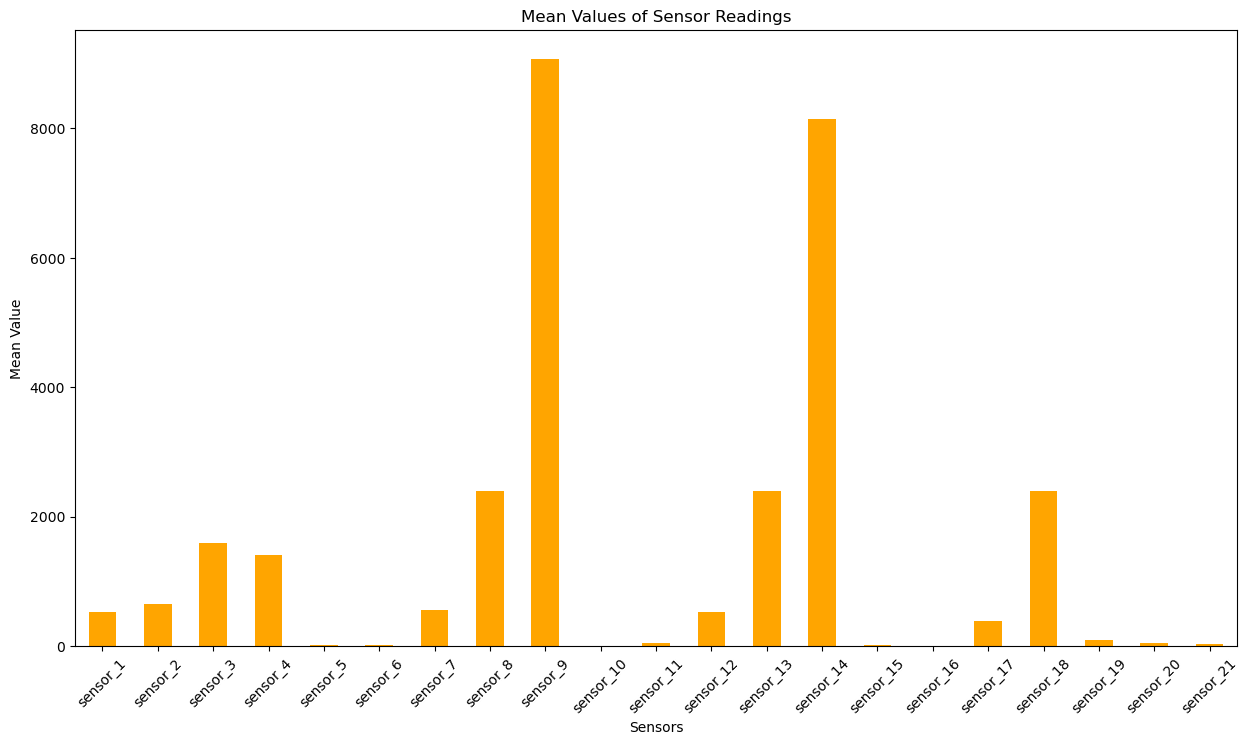

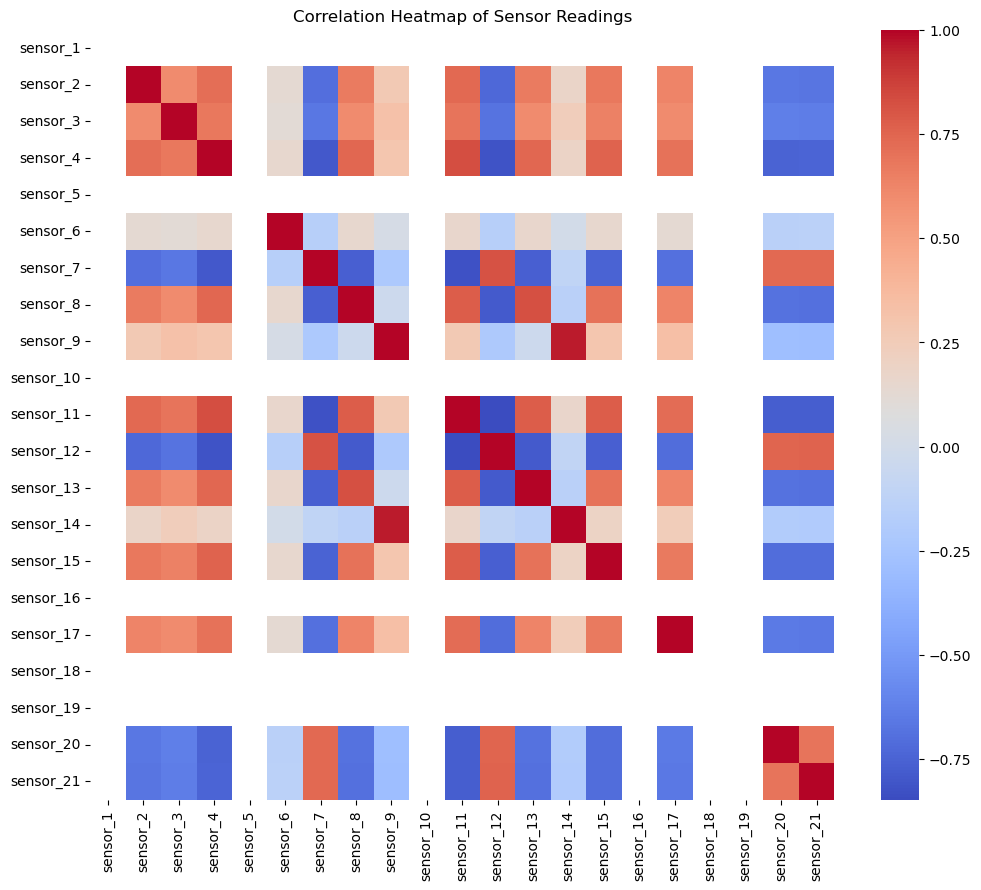

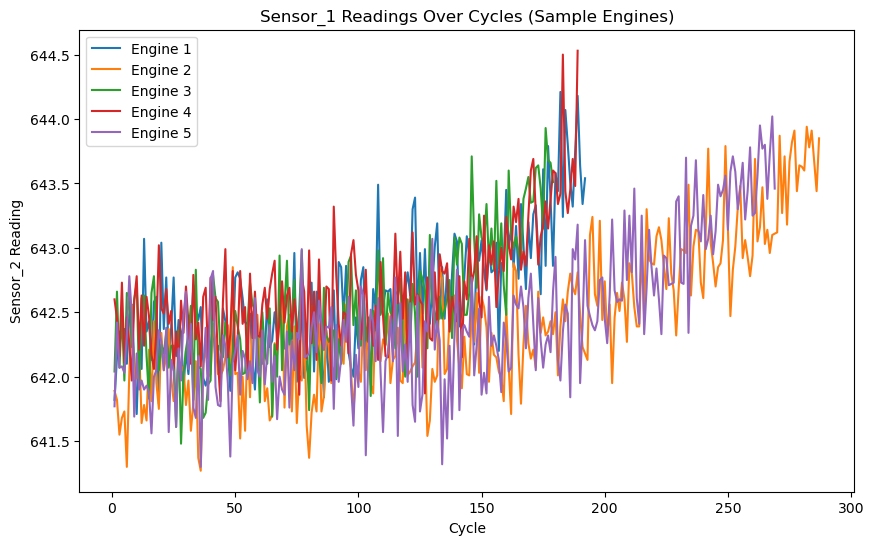

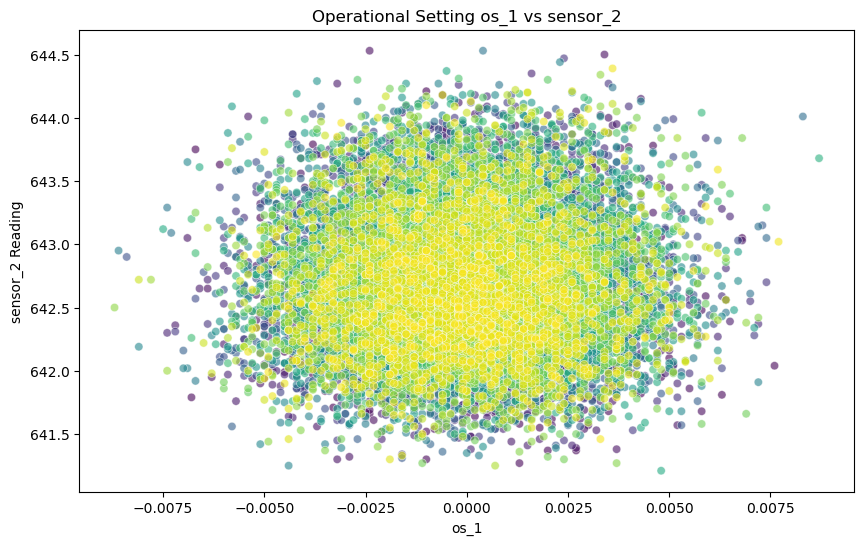

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_dataset_statistics(data):
    # Overview statistics
    print("Dataset Overview:")
    print(data.info())
    print("\nDescriptive Statistics:")
    print(data.describe())

    # Number of cycles per engine
    engine_cycles = data.groupby('engine_id')['cycle'].max()
    print("\nNumber of cycles per engine:")
    print(engine_cycles.describe())

    # Visualize number of cycles per engine
    plt.figure(figsize=(10, 6))
    sns.histplot(engine_cycles, kde=True, bins=20, color='blue')
    plt.title("Distribution of Number of Cycles per Engine")
    plt.xlabel("Number of Cycles")
    plt.ylabel("Number of identifyable Engines")
    plt.show()

    # Visualize operational settings
    for i in range(1, 4):
        plt.figure(figsize=(10, 6))
        sns.histplot(data[f'os_{i}'], kde=True, bins=20, color='green')
        plt.title(f"Distribution of Operational Setting os_{i}")
        plt.xlabel(f"os_{i}")
        plt.ylabel("Frequency")
        plt.show()

    # Visualize sensor readings
    sensor_cols = [f'sensor_{i}' for i in range(1, 22)]
    plt.figure(figsize=(15, 8))
    data[sensor_cols].mean().plot(kind='bar', color='orange')
    plt.title("Mean Values of Sensor Readings")
    plt.xlabel("Sensors")
    plt.ylabel("Mean Value")
    plt.xticks(rotation=45)
    plt.show()

    # Correlation heatmap of sensor readings
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[sensor_cols].corr(), cmap='coolwarm', annot=False)
    plt.title("Correlation Heatmap of Sensor Readings")
    plt.show()

    # Sensor trends over cycles (example with sensor_2)
    plt.figure(figsize=(10, 6))
    for engine_id in data['engine_id'].unique()[:5]:  # Plot a few engines for clarity
        subset = data[data['engine_id'] == engine_id]
        plt.plot(subset['cycle'], subset['sensor_2'], label=f'Engine {engine_id}')
    plt.title("Sensor_1 Readings Over Cycles (Sample Engines)")
    plt.xlabel("Cycle")
    plt.ylabel("Sensor_2 Reading")
    plt.legend()
    plt.show()

def visualise_os_vs_sensor(data, os_id, sensor_id):
    # Example: Scatter plot of os_1 vs sensor_1
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=os_id, y=sensor_id, hue='engine_id', palette='viridis', alpha=0.6)
    plt.title(f"Operational Setting {os_id} vs {sensor_id}")
    plt.xlabel(f"{os_id}")
    plt.ylabel(f"{sensor_id} Reading")
    plt.legend([],[], frameon=False)  # Hide legend for clarity
    plt.show()

# Example usage:
data_path = "data/CMAPSSData/train_FD001.txt"

# Load dataset
column_names = ['engine_id', 'cycle'] + \
                [f'os_{i+1}' for i in range(3)] + \
                [f'sensor_{i+1}' for i in range(21)]

data = pd.read_csv(
    data_path, sep=r"\s+", header=None, names=column_names, engine='python', index_col=None)

visualize_dataset_statistics(data)
visualise_os_vs_sensor(data, 'os_1', 'sensor_2')

<div style="padding: 10px; border-left: 4px solid #2196F3; background-color: #E3F2FD;">
<strong>Info:</strong> White lines or columns in the heat map means that the corresponding sensor has no change or minimal variation. With such values a correlation cannot be defined, hence the areas are white in the heat map. One example is sensor_10.
</div>

In [146]:
data_path = "data/CMAPSSData/train_FD001.txt"
column_names = ['engine_id', 'cycle'] + \
               [f'os_{i+1}' for i in range(3)] + \
               [f'sensor_{i}' for i in range(1, 22)]

raw_data = pd.read_csv(data_path, sep=r"\s+", header=None, names=column_names, engine='python')

# Step 2: Exploratory Data Analysis (EDA)

This EDA is tailored to the NASA Turbofan Engine Degradation Dataset. The goal is to understand the dataset's structure, identify patterns, and prepare for feature engineering and modeling.

---

## 1. Dataset Overview
We have already done this in `Overview of the NASA Turbofan Engine Degradation Dataset` section.

- **Objective**: Understand the structure and general properties of the dataset.
- **Steps**:
  - Load the dataset and display the first few rows (`data.head()`).
  - Check the dataset’s shape and column names (`data.shape`, `data.columns`).
  - Print a summary of the dataset (`data.info()`).
  - Compute descriptive statistics for all columns (`data.describe()`).

---

## 2. Check for Missing or Anomalous Data
- **Objective**: Identify missing values, anomalies, or outliers.
- **Steps**:
  - Count missing values for each column (`data.isnull().sum()`).
  - Look for unexpected constant or near-constant values in sensors (e.g., `sensor_10.describe()`).
  - Use visualizations (like histograms or box plots) to identify outliers for key features.

---



Checking for missing values...

engine_id    0
cycle        0
os_1         0
os_2         0
os_3         0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
dtype: int64
No missing values detected.

Checking for near-constant sensor readings...

Columns with constant values:
['os_3', 'sensor_18', 'sensor_19']
Visualizing sensor value distributions...



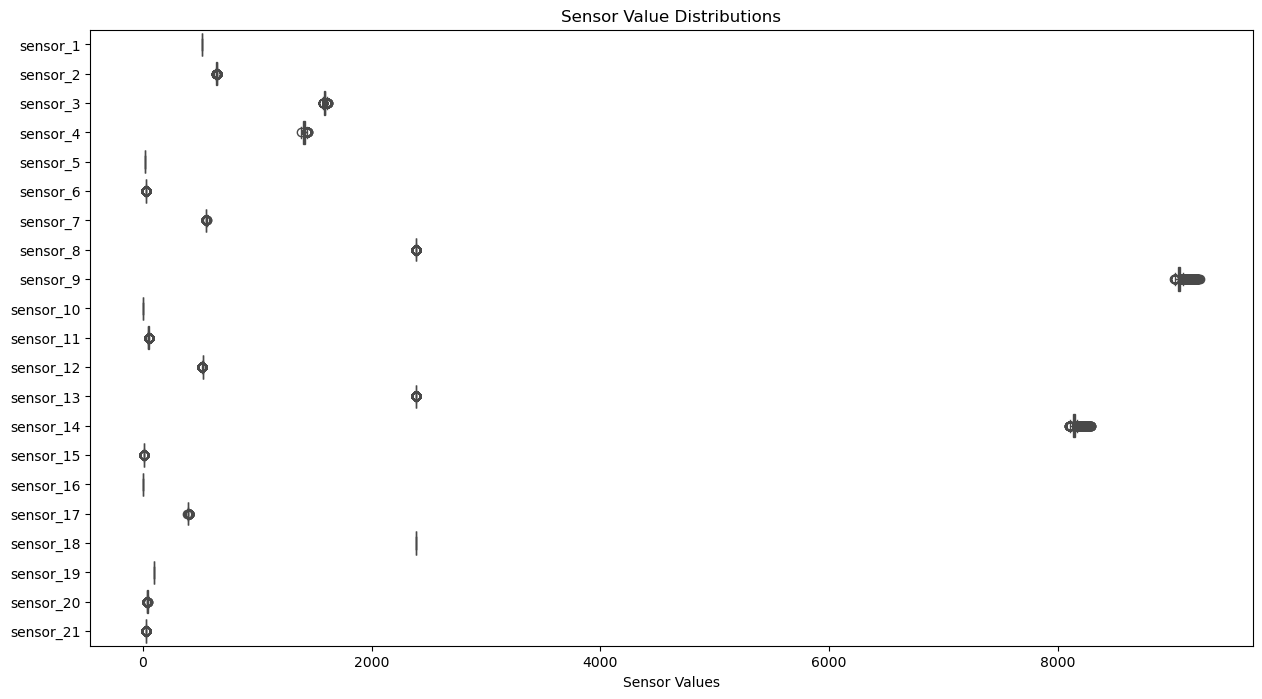

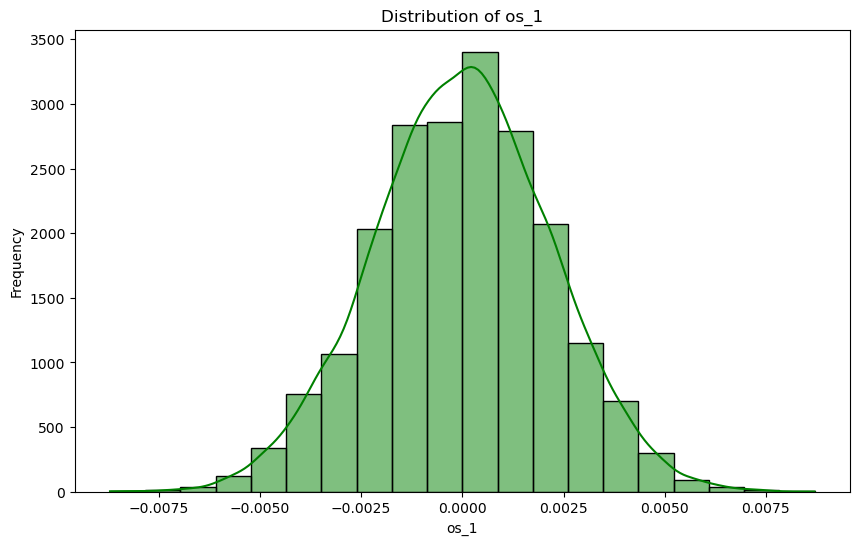

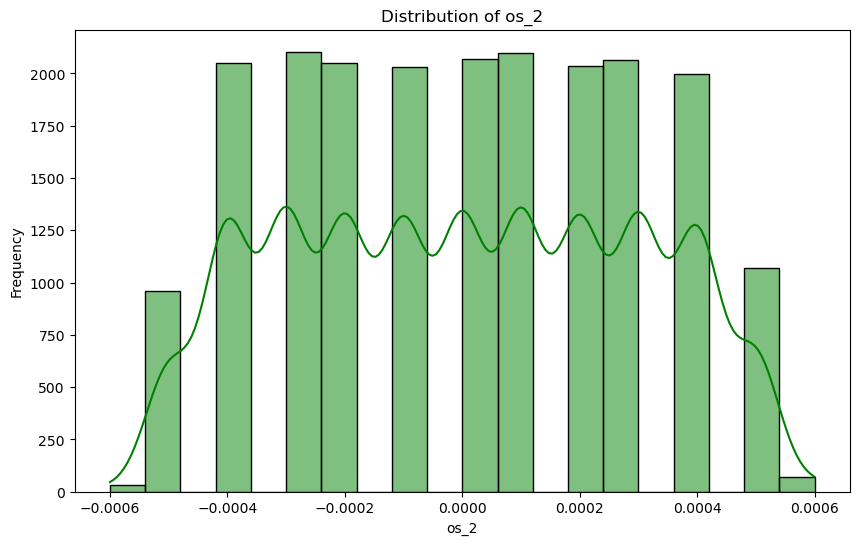

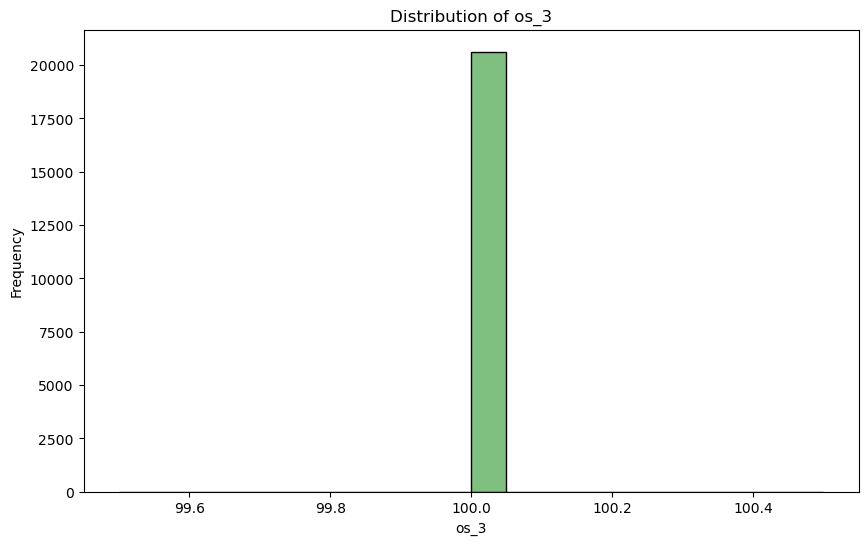

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_missing_and_anomalies(data):
    # 1. Check for missing values
    print("Checking for missing values...\n")
    missing_values = data.isnull().sum()
    print(missing_values)
    
    # Visualize missing values if any
    if missing_values.sum() > 0:
        plt.figure(figsize=(12, 6))
        sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
        plt.title("Missing Values Heatmap")
        plt.show()
    else:
        print("No missing values detected.\n")
    
    # 2. Check for near-constant values
    print("Checking for near-constant sensor readings...\n")
    near_constant = data.describe().T.query("std == 0")
    if not near_constant.empty:
        print(f"Columns with constant values:\n{near_constant.index.tolist()}")
    else:
        print("No near-constant columns detected.\n")
    
    # 3. Visualize sensor value distributions for anomalies
    print("Visualizing sensor value distributions...\n")
    sensor_cols = [col for col in data.columns if col.startswith("sensor_")]
    
    # Boxplot for all sensors to identify anomalies
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=data[sensor_cols], orient="h", palette="coolwarm")
    plt.title("Sensor Value Distributions")
    plt.xlabel("Sensor Values")
    plt.show()

    # Plot histograms for operational settings
    operational_settings = [col for col in data.columns if col.startswith("os_")]
    for os_col in operational_settings:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[os_col], kde=True, bins=20, color="green")
        plt.title(f"Distribution of {os_col}")
        plt.xlabel(os_col)
        plt.ylabel("Frequency")
        plt.show()

data = data.loc[:, ~data.columns.str.contains('Unnamed')]

check_missing_and_anomalies(data)


**Result:** os_3 is a static value (no variation). No anomalies, no NaN values, the dataset seems to be relative clean.

## 3. Engine Lifetime Analysis
- **Objective**: Examine how long engines operate before failure.
- **Steps**:
  - Calculate the total number of cycles for each engine (`data.groupby('engine_id')['cycle'].max()`).
  - Visualize the distribution of engine lifetimes (e.g., histogram).
  - Analyze variability in lifetimes:
    ```python
    engine_cycles = data.groupby('engine_id')['cycle'].max()
    print(engine_cycles.describe())
    ```

---

Summary Statistics for Engine Operation Duration:
count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64


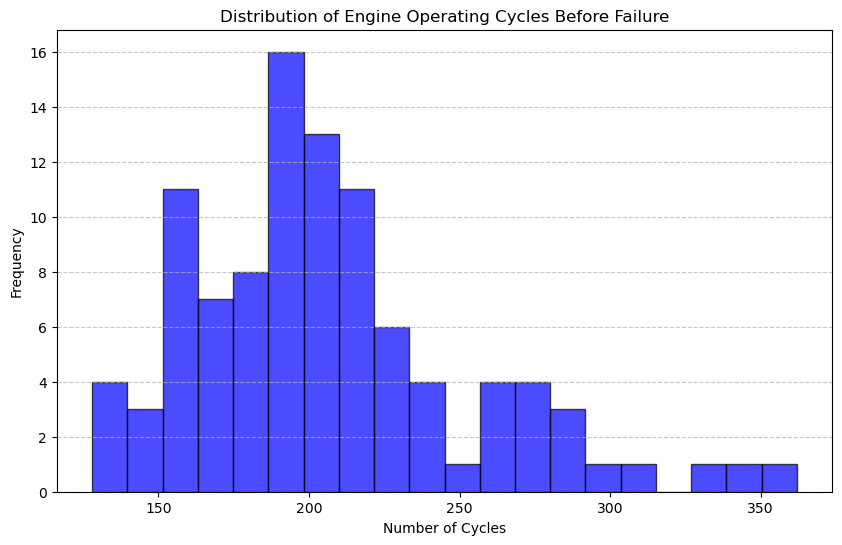

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by engine_id to calculate the number of cycles for each engine
engine_cycles = raw_data.groupby('engine_id')['cycle'].max()

# Summary statistics
print("Summary Statistics for Engine Operation Duration:")
print(engine_cycles.describe())

# Plot the distribution of cycles per engine
plt.figure(figsize=(10, 6))
plt.hist(engine_cycles, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Engine Operating Cycles Before Failure')
plt.xlabel('Number of Cycles')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<div style="padding: 10px; border-left: 4px solid #FF9800; background-color: #FFF3E0;">
<strong>Hint:</strong> In the NASA Turbofan Engine Degradation Dataset, the failure of an engine is implicitly encoded by the end of the logged cycles for that engine. So failure is not explicitely labeled.
</div>

## 4. Operational Settings Analysis
- **Objective**: Understand the variability in operational settings (`os_1`, `os_2`, `os_3`).
- **Steps**:
  - Visualize the distribution of each operational setting using histograms or box plots.
  - Explore correlations between operational settings and sensor readings.

---

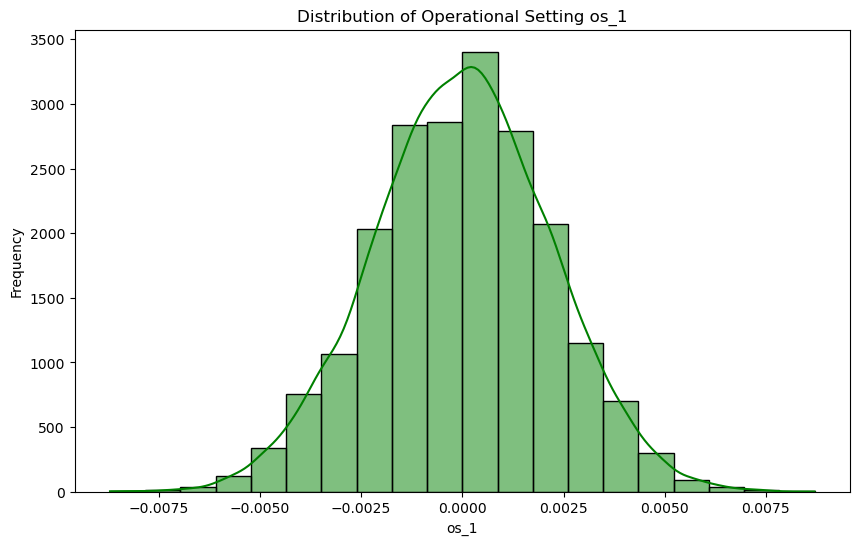

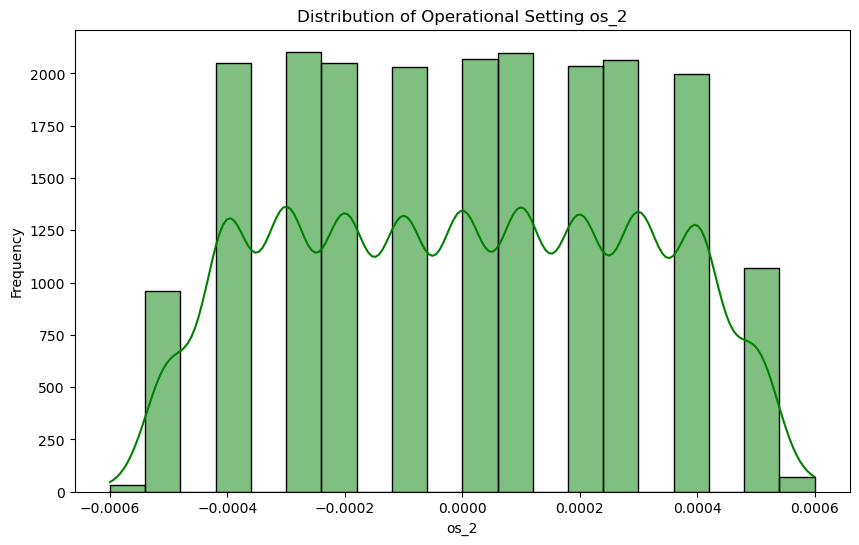

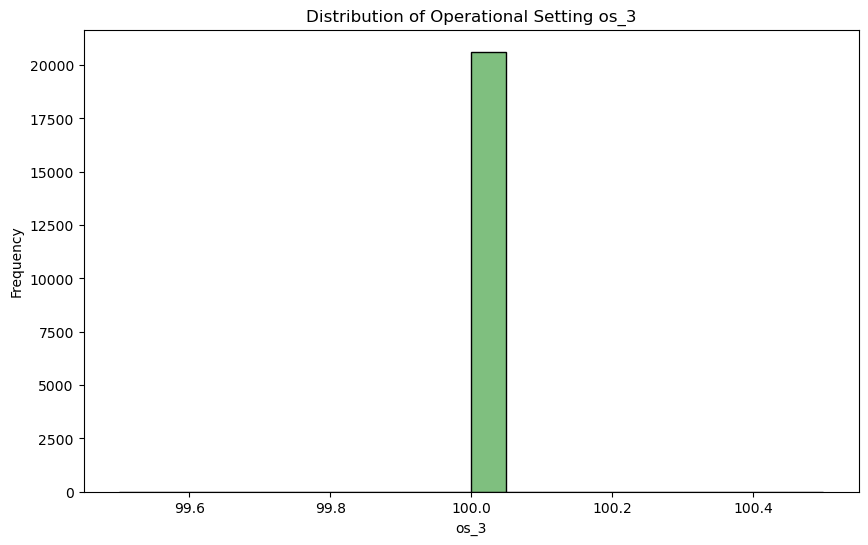

In [149]:
# Visualize operational settings
for i in range(1, 4):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[f'os_{i}'], kde=True, bins=20, color='green')
    plt.title(f"Distribution of Operational Setting os_{i}")
    plt.xlabel(f"os_{i}")
    plt.ylabel("Frequency")
    plt.show()

**Observation:** As we have already seen, os_3 is only a static value (every row has the same value for os_3 column). Such values can be removed from the dataset, they don't add information to the training.

## 5. Sensor Data Analysis
- **Objective**: Understand the behavior of sensor readings over time and across engines.
- **Steps**:
  - **Summary Statistics**:
    - Compute mean, variance, min, and max for all sensor columns.
  - **Correlation Analysis**:
    - Create a heatmap to show correlations between sensors:
      ```python
      sns.heatmap(data[[f'sensor_{i}' for i in range(1, 22)]].corr(), cmap='coolwarm')
      ```
  - **Trend Analysis**:
    - Plot individual sensors over cycles for a few engines to observe degradation patterns.

---


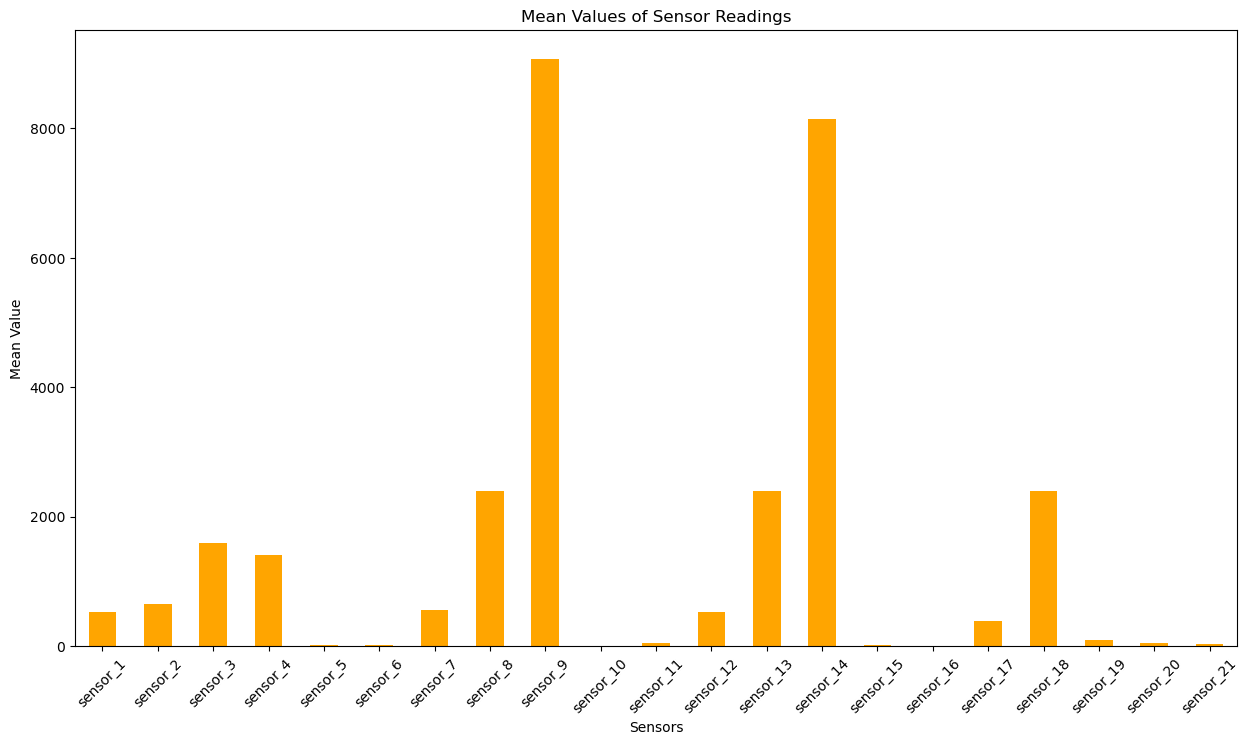

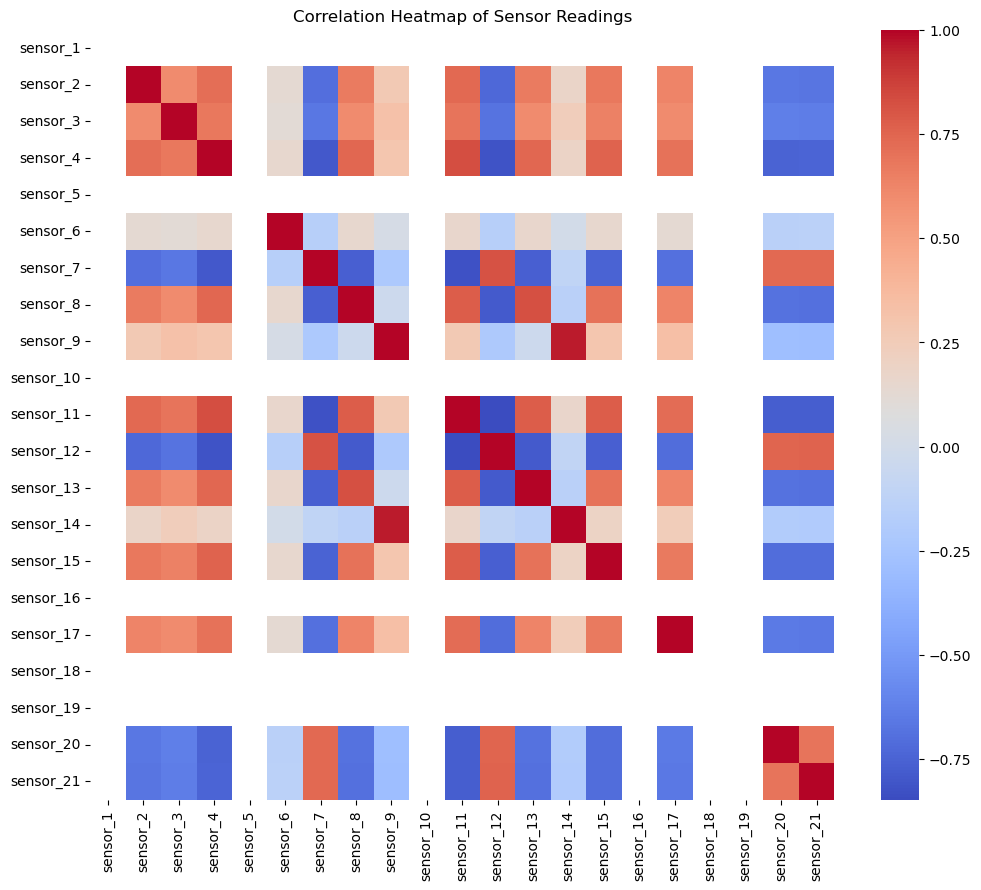

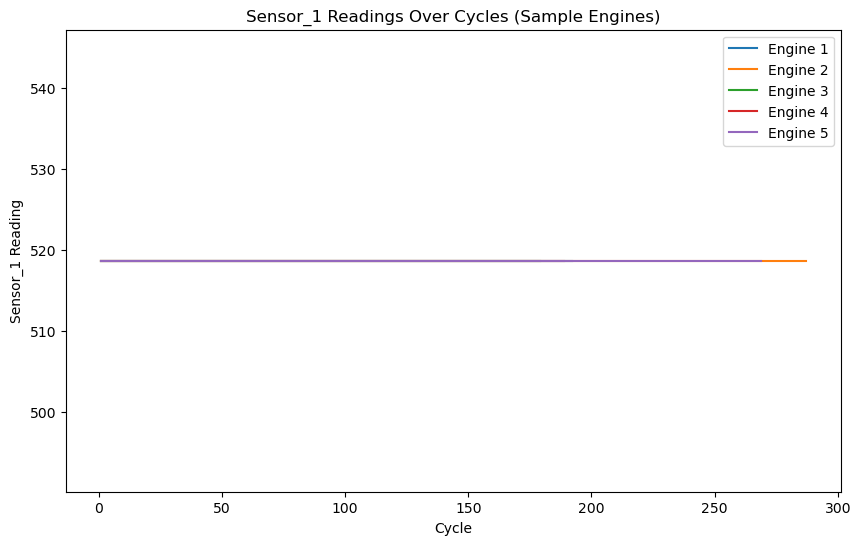

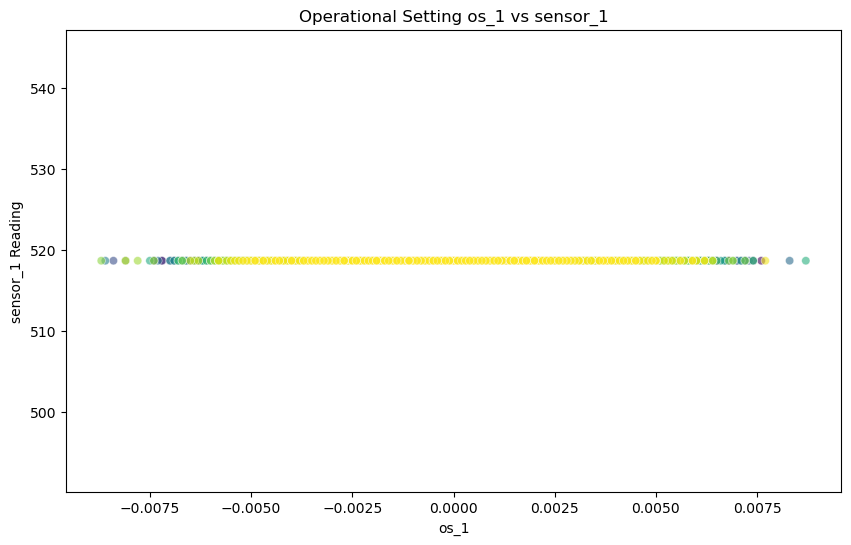

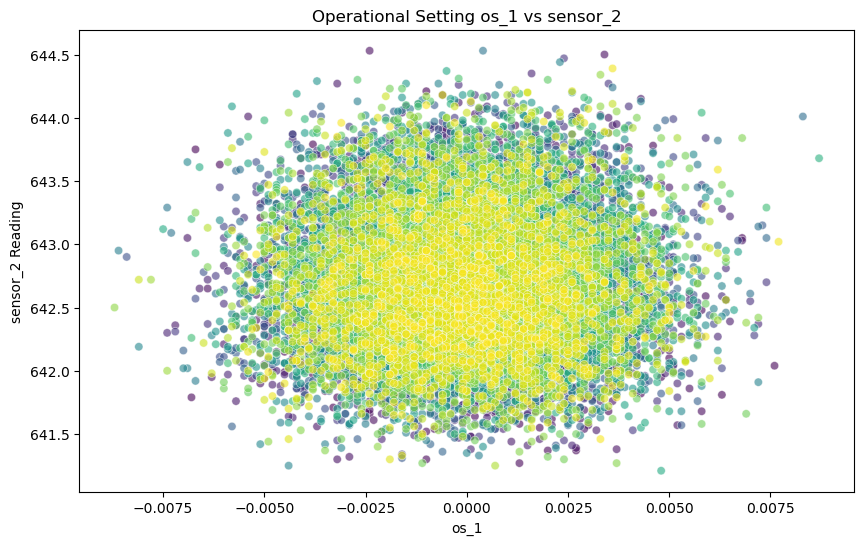

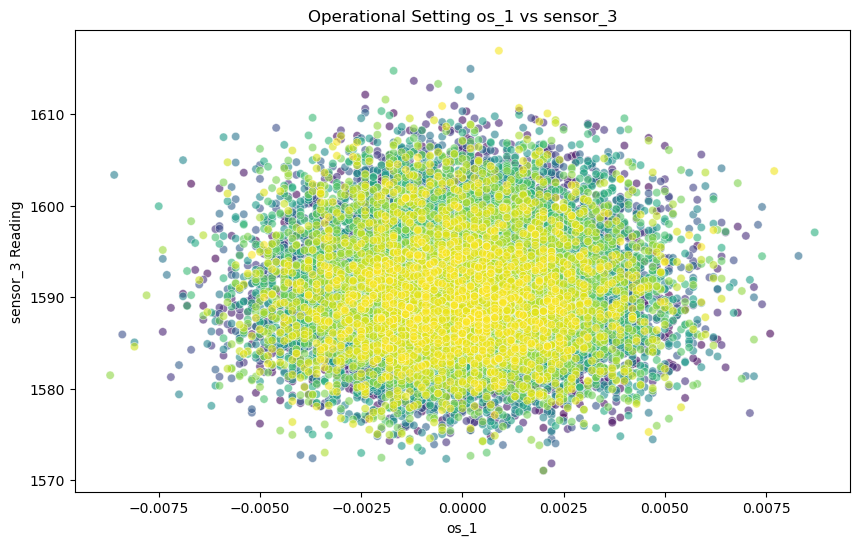

In [150]:
# Visualize sensor readings
sensor_cols = [f'sensor_{i}' for i in range(1, 22)]
plt.figure(figsize=(15, 8))
data[sensor_cols].mean().plot(kind='bar', color='orange')
plt.title("Mean Values of Sensor Readings")
plt.xlabel("Sensors")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap of sensor readings
plt.figure(figsize=(12, 10))
sns.heatmap(data[sensor_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Sensor Readings")
plt.show()

# Sensor trends over cycles (example with sensor_1)
plt.figure(figsize=(10, 6))
for engine_id in data['engine_id'].unique()[:5]:  # Plot a few engines for clarity
    subset = data[data['engine_id'] == engine_id]
    plt.plot(subset['cycle'], subset['sensor_1'], label=f'Engine {engine_id}')
plt.title("Sensor_1 Readings Over Cycles (Sample Engines)")
plt.xlabel("Cycle")
plt.ylabel("Sensor_1 Reading")
plt.legend()
plt.show()

def visualise_os_vs_sensor(data, os_id, sensor_id):
    # Example: Scatter plot of os_1 vs sensor_1
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=os_id, y=sensor_id, hue='engine_id', palette='viridis', alpha=0.6)
    plt.title(f"Operational Setting {os_id} vs {sensor_id}")
    plt.xlabel(f"{os_id}")
    plt.ylabel(f"{sensor_id} Reading")
    plt.legend([],[], frameon=False)  # Hide legend for clarity
    plt.show()

visualise_os_vs_sensor(data, 'os_1', 'sensor_1')
visualise_os_vs_sensor(data, 'os_1', 'sensor_2')
visualise_os_vs_sensor(data, 'os_1', 'sensor_3')

**Observations:** sensor_1 is also of static nature. No variation, it is a constant value for all rows. I am not sure if this is intentional or an error. sensor_1 should measure the inlet temperature in front of the engine, if it is measured in a test labor, then this could be indeed a static value (but this is still not very probable). Anyway, we will remove that value too from the dataset.

## 6. Degradation Trends
- **Objective**: Identify how engine health degrades over time.
- **Steps**:
  - Select a few engines and visualize sensor readings over cycles.
  - Look for:
    - Gradual changes (e.g., linear trends).
    - Sudden spikes (e.g., anomalies).

---

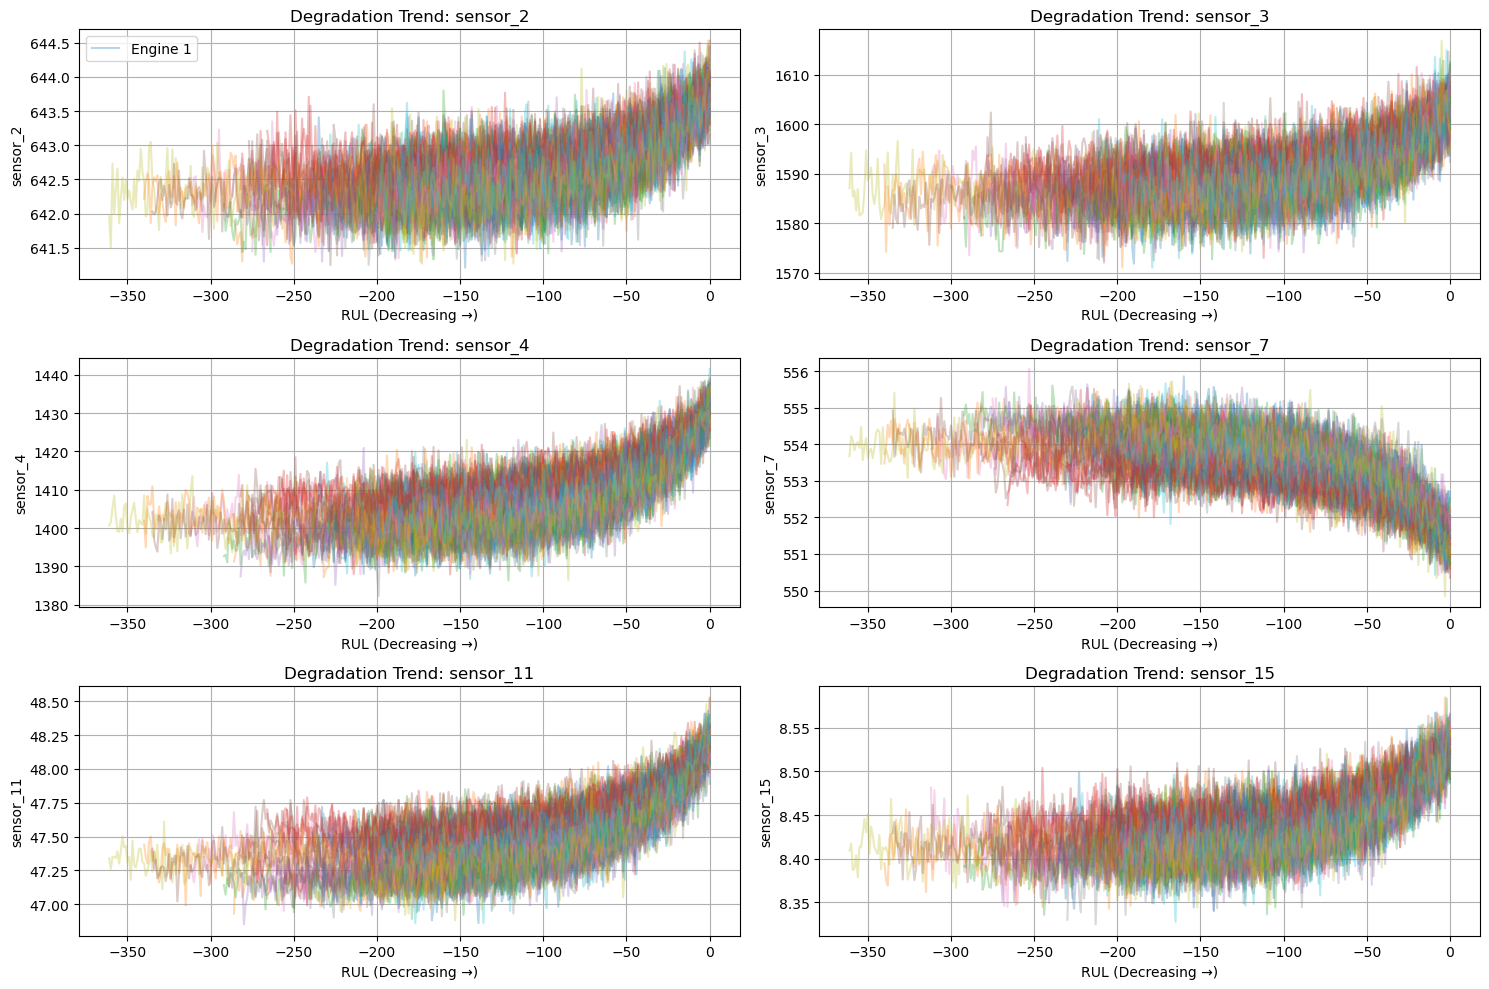

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate RUL
raw_data['RUL'] = raw_data.groupby('engine_id')['cycle'].transform('max') - raw_data['cycle']

# Select key sensors to analyze (e.g., sensors with known degradation patterns)
selected_sensors = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_15']

# Plot degradation trends for selected sensors
plt.figure(figsize=(15, 10))
for i, sensor in enumerate(selected_sensors, 1):
    plt.subplot(3, 2, i)
    for engine_id, engine_data in raw_data.groupby('engine_id'):
        plt.plot(-engine_data['RUL'], engine_data[sensor], alpha=0.3, label=f'Engine {engine_id}' if engine_id == 1 else "")
    plt.title(f'Degradation Trend: {sensor}')
    plt.xlabel('RUL (Decreasing →)')
    plt.ylabel(sensor)
    plt.grid(True)
    if i == 1:  # Add legend only once
        plt.legend()
plt.tight_layout()
plt.show()


**Observations:** We have plotted the values for all engines and a specific sensor. The RUL is mapped to the x-axis. Because we want to start with full RUL the values are negative up to the 0 when the engine failed (RUL = 0 is the point where the engine failed and no additional sensor data is collected). What the trends clearly show is either an increasing over cycles (decreasing RUL) or decreasing depending of the sensor. 

## 7. Feature Relationships
- **Objective**: Explore relationships between operational settings, sensor readings, and degradation.
- **Steps**:
  - Use scatter plots to explore pairwise relationships between key features.
  - Investigate the relationship between cycle number and sensor readings.

---

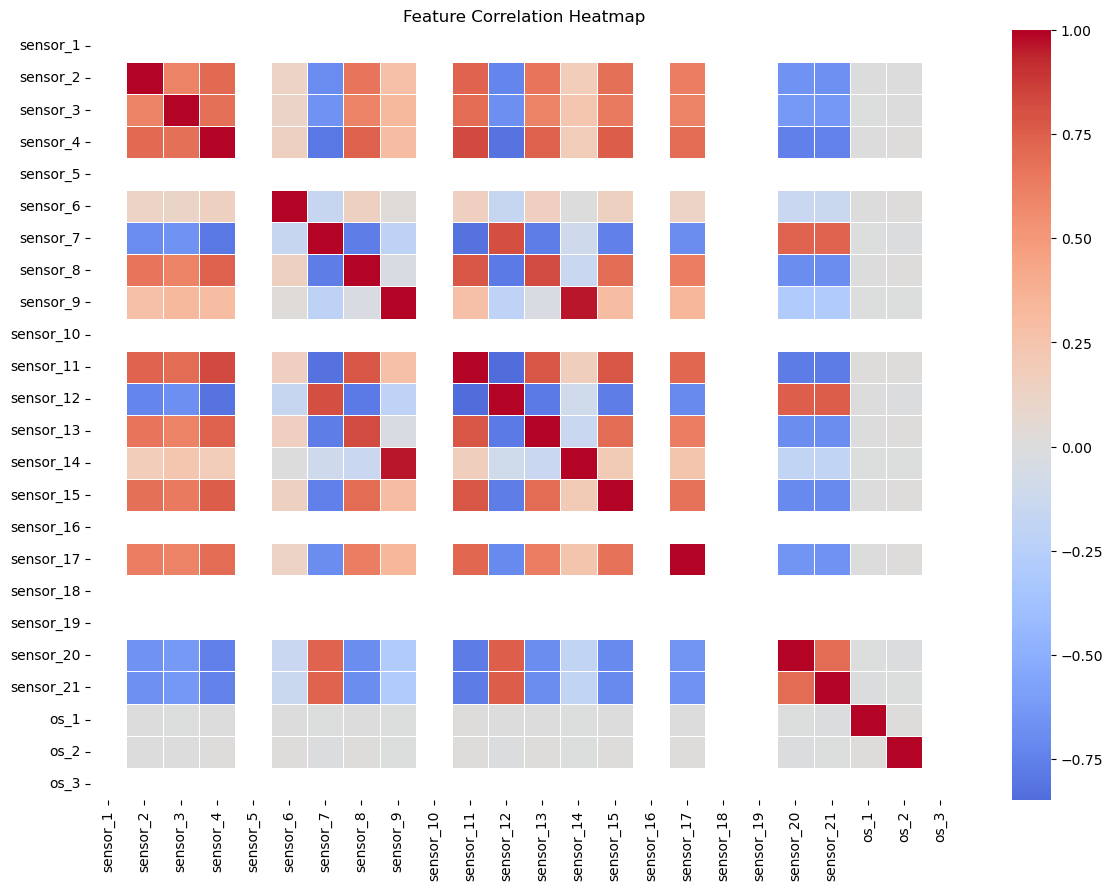

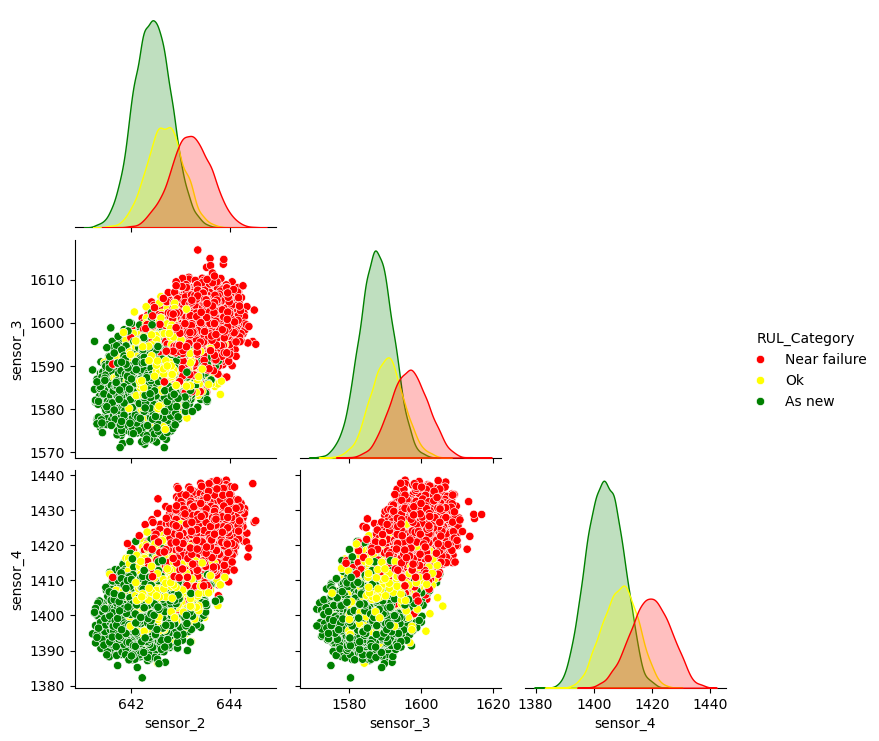

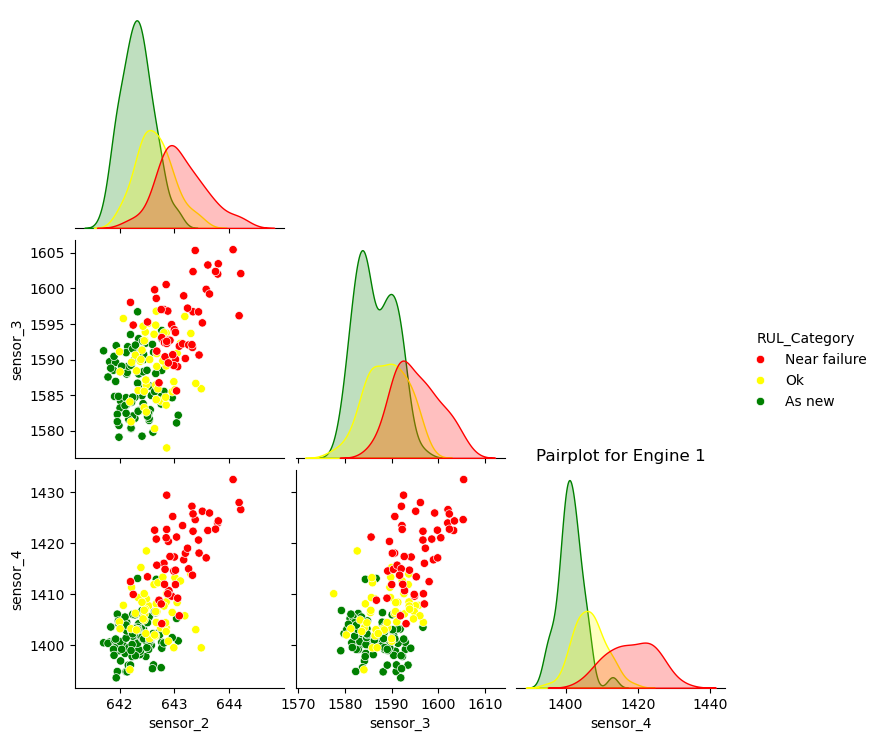

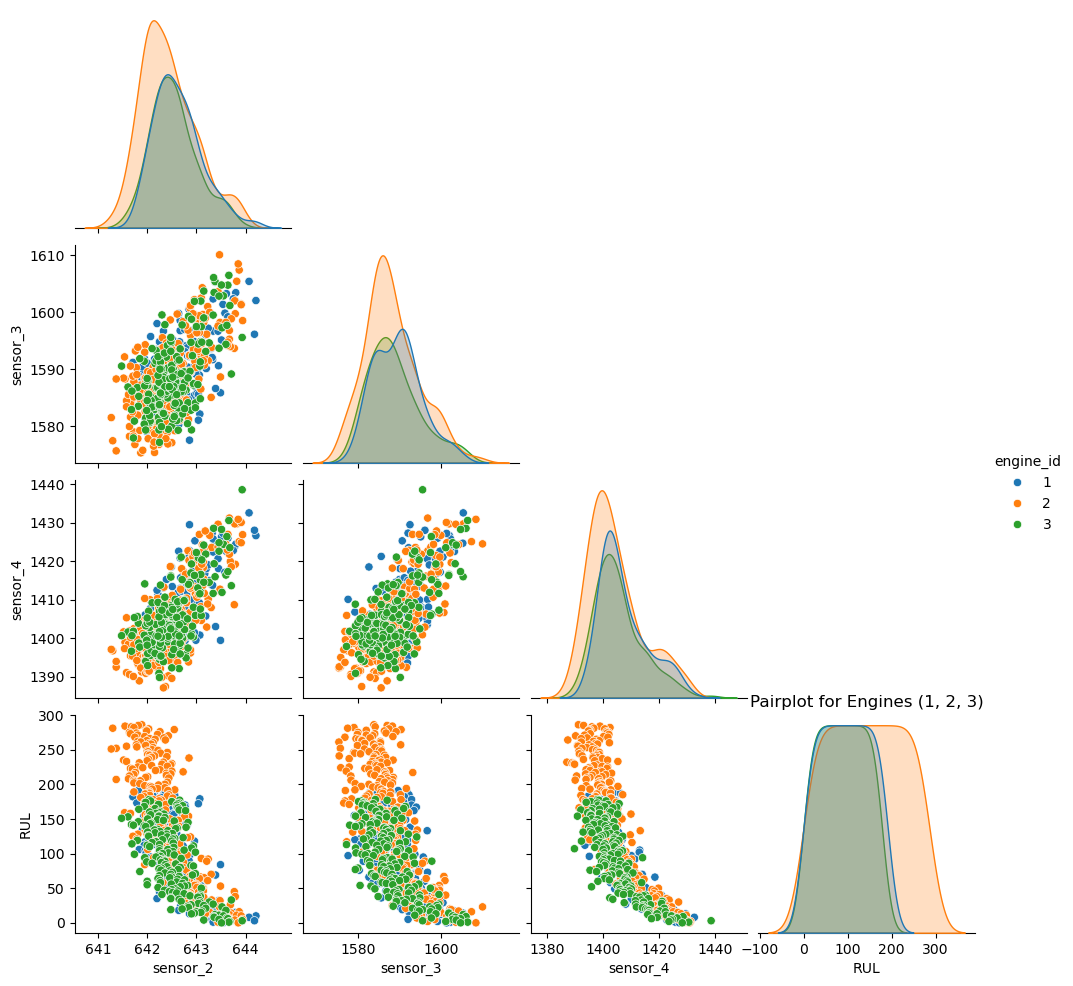

In [155]:
# Calculate RUL
raw_data['RUL'] = raw_data.groupby('engine_id')['cycle'].transform('max') - raw_data['cycle']

# Select features for relationship analysis
selected_features = [f'sensor_{i}' for i in range(1, 22)] + [f'os_{i+1}' for i in range(3)]

# Compute the correlation matrix
correlation_matrix = raw_data[selected_features].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

custom_palette = {
    'Near failure': 'red',
    'Ok': 'yellow',
    'As new': 'green'
}

# Create bins for RUL
raw_data['RUL_Category'] = pd.cut(raw_data['RUL'], bins=[0, 50, 100, raw_data['RUL'].max()], labels=['Near failure', 'Ok', 'As new'])

# Create pairplot with hue based on RUL_Category
sns.pairplot(raw_data[['sensor_2', 'sensor_3', 'sensor_4', 'RUL_Category']], diag_kind='kde', hue='RUL_Category', palette=custom_palette, corner=True)
plt.show()

# Filter data for a specific engine
engine_id = 1
engine_data = raw_data[raw_data['engine_id'] == engine_id]

# Create pairplot for the selected engine
sns.pairplot(engine_data[['sensor_2', 'sensor_3', 'sensor_4', 'RUL_Category']], hue='RUL_Category', diag_kind='kde', corner=True, palette=custom_palette)
plt.title(f"Pairplot for Engine {engine_id}")
plt.show()

# Filter for a subset of engines (e.g., 1, 2, and 3)
subset_engines = raw_data[raw_data['engine_id'].isin([1, 2, 3])]

# Create pairplot with engine_id as hue
sns.pairplot(subset_engines[['sensor_2', 'sensor_3', 'sensor_4', 'RUL', 'engine_id']], 
             diag_kind='kde', 
             hue='engine_id', 
             corner=True, 
             palette='tab10')
plt.title("Pairplot for Engines (1, 2, 3)")
plt.show()


## Understanding Pairplot in Data Analysis

A **pairplot** is a visualization tool in data analysis that shows pairwise relationships between multiple features in a dataset. It is commonly used to identify patterns, trends, and correlations in the data, and is especially useful during Exploratory Data Analysis (EDA).

---

### Components of a Pairplot

#### 1. **Scatterplots (Off-Diagonal)**
- Each off-diagonal plot represents a **scatterplot** of one feature against another.
- Scatterplots allow you to:
  - Visualize relationships (linear, non-linear, or no relationship) between two features.
  - Detect clusters, outliers, or trends in the data.

#### 2. **Univariate Distributions (Diagonal)**
- The diagonal plots display the **distribution** of individual features.
- By default, Seaborn shows **Kernel Density Estimate (KDE)** curves or histograms for each feature.
- If a `hue` is applied, multiple KDE curves or histograms may appear, representing different categories or bins of a variable.

---

### Key Insights from Pairplot

#### Relationships Between Features
- **Positive Correlation**: Scatterplot shows an upward trend (e.g., as `x` increases, `y` increases).
- **Negative Correlation**: Scatterplot shows a downward trend (e.g., as `x` increases, `y` decreases).
- **No Correlation**: Scatterplot appears as a random cloud of points.

#### Feature Distributions
- Identify whether features follow a **normal**, **skewed**, or **multimodal** distribution.
- Helps in deciding whether transformations (e.g., normalization, log transformation) are needed.

#### Clustering
- Points forming groups or clusters indicate subpopulations in the data.
- Clusters may suggest segmentation (e.g., different engine failure modes).

#### Outliers
- Points far from the main data trends or clusters can highlight anomalies or errors in the dataset.

---

### Enhancing Pairplot Interpretation

#### Adding `hue`
- The `hue` parameter allows color coding based on a categorical or binned continuous variable.
- Example:
  - `hue="RUL_Category"` highlights how the relationship between features changes across different stages of engine degradation.

#### Customizing Diagonals
- By default, KDE plots appear on the diagonals.
- You can switch to histograms or modify binning for better visualization.

---

### Practical Use of Pairplots

#### Example Questions Answered by Pairplots
1. Are certain features strongly correlated with each other or with the target variable (e.g., RUL)?
2. Do features exhibit clustering behavior that could indicate subgroups in the data?
3. Are there anomalies or outliers in the data that might need special handling?

#### Benefits in Machine Learning
- Helps identify features that may be **redundant** (strongly correlated with others).
- Reveals features that show clear relationships with the target variable, making them good candidates for predictors.
- Guides feature engineering by highlighting non-linear interactions or clusters.

---

### Example Pairplot Code in Python

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Example pairplot for selected features
sns.pairplot(
    data=raw_data[['sensor_2', 'sensor_3', 'sensor_4', 'RUL']], 
    diag_kind='kde', 
    hue='RUL_Category', 
    corner=True
)
plt.show()


**Observations:** 

## 8. Remaining Useful Life (RUL) Analysis
- **Objective**: Investigate the Remaining Useful Life (RUL) as a target variable.
- **Steps**:
  - Calculate RUL for the training data:
    ```python
    data['RUL'] = data.groupby('engine_id')['cycle'].transform('max') - data['cycle']
    ```
  - Visualize how RUL changes over cycles for a few engines.
  - Correlate RUL with sensor readings to identify the most informative features.

---

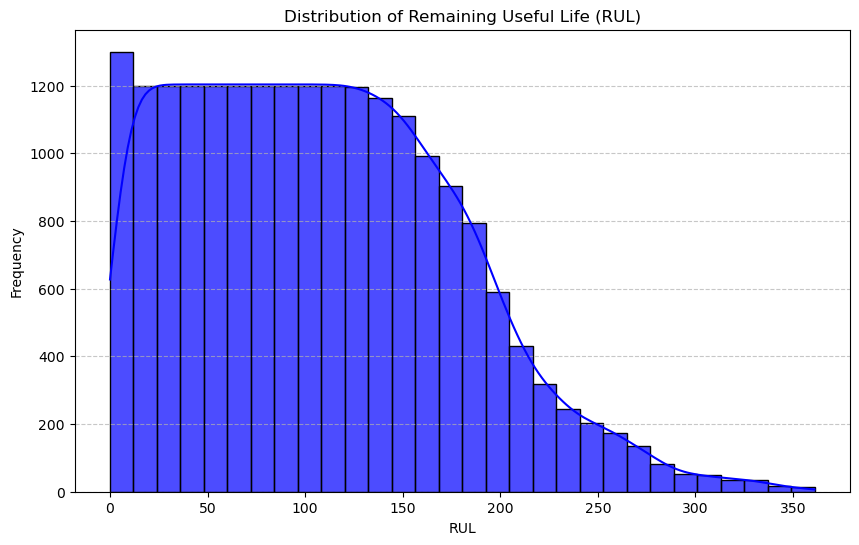

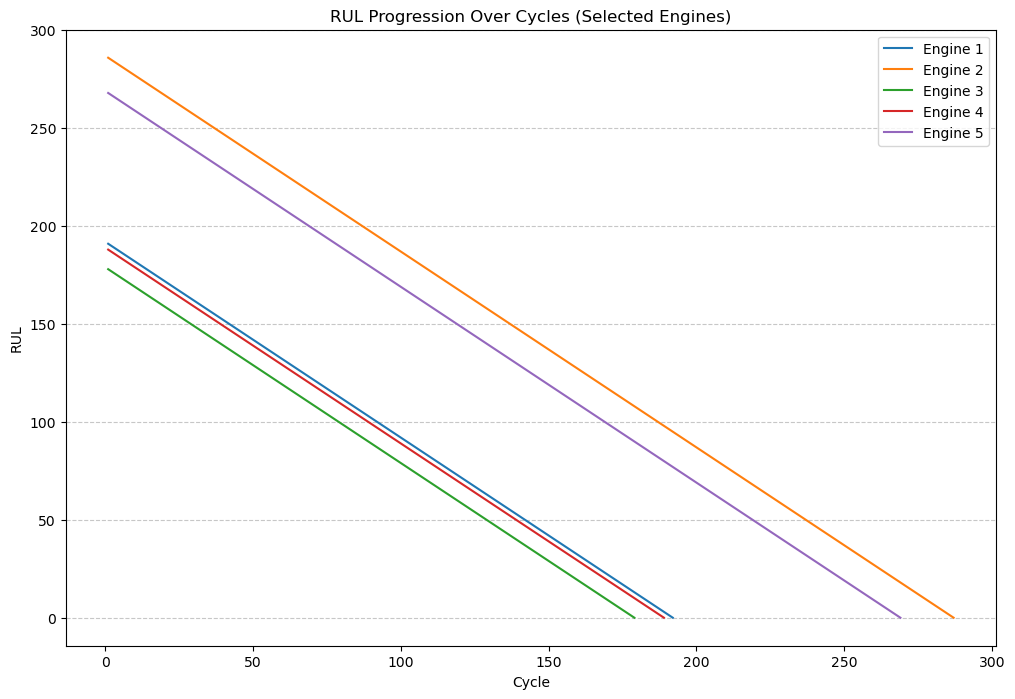

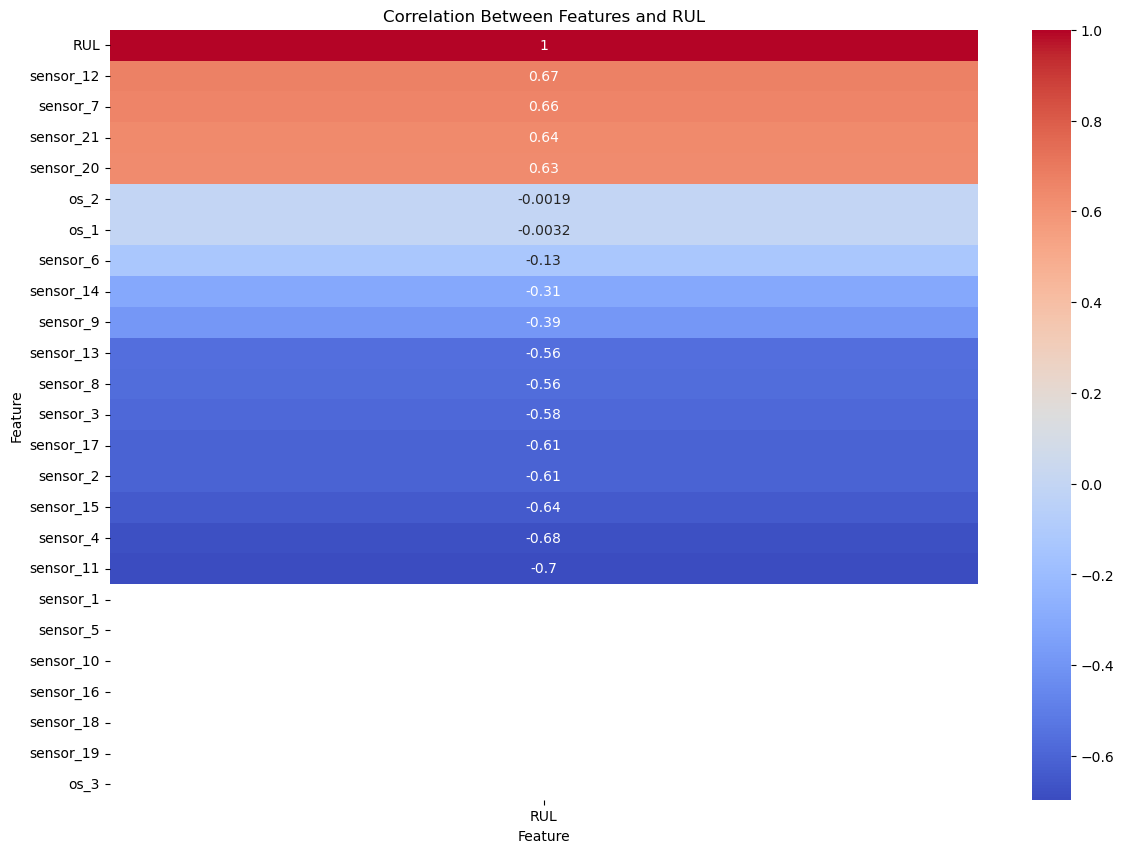

In [156]:
# Calculate RUL
raw_data['RUL'] = raw_data.groupby('engine_id')['cycle'].transform('max') - raw_data['cycle']

# 1. Distribution of RUL
plt.figure(figsize=(10, 6))
sns.histplot(raw_data['RUL'], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Remaining Useful Life (RUL)')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. RUL Progression for Selected Engines
plt.figure(figsize=(12, 8))
for engine_id in raw_data['engine_id'].unique()[:5]:  # Plot for the first 5 engines
    engine_data = raw_data[raw_data['engine_id'] == engine_id]
    plt.plot(engine_data['cycle'], engine_data['RUL'], label=f'Engine {engine_id}')
plt.title('RUL Progression Over Cycles (Selected Engines)')
plt.xlabel('Cycle')
plt.ylabel('RUL')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Correlation Between RUL and Features (Heatmap)
selected_features = [f'sensor_{i}' for i in range(1, 22)] + [f'os_{i+1}' for i in range(3)]
feature_corr = raw_data[selected_features + ['RUL']].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(feature_corr[['RUL']].sort_values(by='RUL', ascending=False), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Between Features and RUL')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()


### Understanding the Low/High RUL Distribution in the Dataset

#### RUL Calculation
For each engine, the Remaining Useful Life (RUL) is calculated as:
$$
\text{RUL} = \text{max(cycle)} - \text{current(cycle)}
$$
This ensures that the RUL decreases by 1 for every subsequent cycle. Rows in the dataset are ordered sequentially by `cycle` for each engine, so RUL decreases consistently as `cycle` increases.

---

#### Why Are There More Rows with Low RUL Than High RUL?

The imbalance in RUL values arises due to how the dataset is structured and aggregated, not the RUL formula itself. Below are the reasons:

##### 1. **Variability in Engine Lifetimes**
- Each engine has a different maximum cycle (`max(cycle)`), meaning engines fail at different points.
- Engines with shorter lifetimes contribute fewer rows with high RUL values but still contribute rows near failure (low RUL values).

##### 2. **More Engines Near Failure**
- Data logging ends when engines fail. Thus, **all engines contribute rows with RUL = 0**.
- However, not all engines contribute rows with high RUL values because:
  - Engines are introduced into the dataset at different stages of their lifecycle.
  - Data collection may focus on the degradation phase (near failure), leading to fewer rows for high RUL.

##### 3. **Dataset Design**
- The dataset intentionally over-represents the degradation phase (low RUL) to provide more data for engine behavior near failure.
- This is because predicting failures (low RUL) is more critical for maintenance planning than modeling early operational stages (high RUL).

##### 4. **Aggregation Bias**
- When combining data from multiple engines:
  - All engines contribute rows near failure (low RUL).
  - For higher RUL values, only a subset of engines contributes data, leading to fewer rows.

---

#### Illustration

Consider three engines with different lifetimes:

| **Engine ID** | **Cycle Range** | **RUL Range** |
|---------------|----------------|---------------|
| Engine 1      | 1–10           | 9–0           |
| Engine 2      | 5–15           | 10–0          |
| Engine 3      | 8–18           | 10–0          |

- **High RUL (e.g., RUL = 9, 10)**:
  - Only rows from engines 2 and 3 contribute.
  - Total rows: 4 (engine 2: cycle 5–8, engine 3: cycle 8–9).

- **Low RUL (e.g., RUL = 0, 1, 2)**:
  - All engines contribute rows near failure.
  - Total rows: 6 (engine 1: cycle 8–10, engine 2: cycle 13–15, engine 3: cycle 16–18).

This aggregation leads to more rows with low RUL values than high RUL values.

---

#### Practical Implications

##### 1. **Critical Focus on Degradation Phase**
- The dataset is biased toward the critical degradation phase, which is useful for failure prediction.

##### 2. **Class Imbalance**
- The imbalance can cause a model to:
  - Overfit to the low RUL range (frequent values).
  - Struggle to predict high RUL values (infrequent values).
- Techniques like resampling, weighted loss functions, or careful evaluation are needed to handle this.

---

#### Summary

- **Per Engine**:
  - RUL decreases linearly with each cycle.
- **Dataset-Wide**:
  - Rows with low RUL dominate because:
    - All engines contribute rows near failure.
    - Fewer engines contribute rows with high RUL.
- **Imbalance**:
  - The dataset reflects a purposeful focus on failure prediction, which introduces imbalance but ensures critical phases are well-represented.

---



### Handling RUL Imbalance: Is Conservatism Better?

#### **Why a Conservative Model Is Desirable**

In safety-critical systems like predictive maintenance, it is better to err on the side of caution. This means prioritizing **false positives** (predicting failure when none occurs) over **false negatives** (missing an actual failure). Here's why:

1. **Safety Prioritization**:
   - Missing a failure prediction (false negative) can lead to catastrophic consequences, such as engine failure or downtime.
   - Predicting a failure that doesn’t occur (false positive) results in unnecessary maintenance, which is safer and less costly.

2. **Dataset Bias Toward Low RUL**:
   - The dataset already focuses more on low RUL values (near failure), aligning with the goal of building a conservative model.

---

#### **Should We Address the RUL Bias?**

- **If false negatives are extremely costly**:
  - Retaining the dataset's degradation bias is preferred to encourage conservative predictions.
  
- **If generalization is important**:
  - Addressing the bias selectively ensures the model doesn’t overfit to the low RUL phase, improving its ability to predict across all lifecycle stages.

---

#### **How to Build a Conservative Model**

To handle the RUL imbalance while maintaining conservatism, the following strategies can be applied:

##### **1. Weighted Loss Function**
- Penalize under-predictions (false negatives) more heavily than over-predictions (false positives).
- This ensures the model prioritizes accuracy in predicting failures.

###### Example: Custom Loss for Conservative Predictions
```python
import torch
import torch.nn as nn

class ConservativeMSELoss(nn.Module):
    def __init__(self, penalty_factor=2.0):
        super(ConservativeMSELoss, self).__init__()
        self.penalty_factor = penalty_factor

    def forward(self, predictions, targets):
        # Compute error
        error = predictions - targets
        
        # Apply penalty for under-predictions (false negatives)
        penalty = torch.where(error < 0, self.penalty_factor, 1.0)
        
        # Weighted MSE loss
        loss = penalty * (error ** 2)
        return torch.mean(loss)

# Example: Use the custom loss
criterion = ConservativeMSELoss(penalty_factor=2.0)
```

---

##### **2. Evaluation Metrics**
- Focus on **low RUL performance**, ensuring high precision and recall in the critical phase (near failure).
- Evaluate metrics separately for different RUL ranges (e.g., low, medium, high).

###### Example: Metrics for Low RUL
```python
def low_rul_metrics(predictions, targets, threshold=50):
    low_rul_mask = targets <= threshold
    low_rul_predictions = predictions[low_rul_mask]
    low_rul_targets = targets[low_rul_mask]
    
    # Precision, recall, or other metrics
    precision = ...  # Define based on your specific needs
    recall = ...
    return precision, recall
```

---

##### **3. Data Resampling**
- Selectively balance the dataset:
  - Oversample **mid-lifecycle RUL** rows to improve generalization.
  - Retain the degradation bias for **low RUL** to prioritize failure prediction.

---

##### **4. Predictive Thresholding**
- Use a **conservative threshold** to classify engines as near failure.
- For example:
  - If the predicted RUL is slightly above the failure threshold, still classify it as a potential failure to ensure safety.

---

#### **Conclusion**

1. **Conservatism Is Necessary**:
   - Safety-critical systems demand models that minimize false negatives, even at the cost of tolerating some false positives.

2. **Bias Is Useful**:
   - The dataset's focus on low RUL values aligns with this goal, supporting failure prediction.

3. **Balanced Approach**:
   - Address the bias selectively (e.g., weighted loss, resampling mid-RUL data) to improve generalization while retaining a focus on the degradation phase.


## 9. Engine-Specific Analysis
- **Objective**: Understand the variation between different engines.
- **Steps**:
  - Compare sensor reading distributions across engines.
  - Plot sensor reading averages per engine to observe consistency or variability.

---

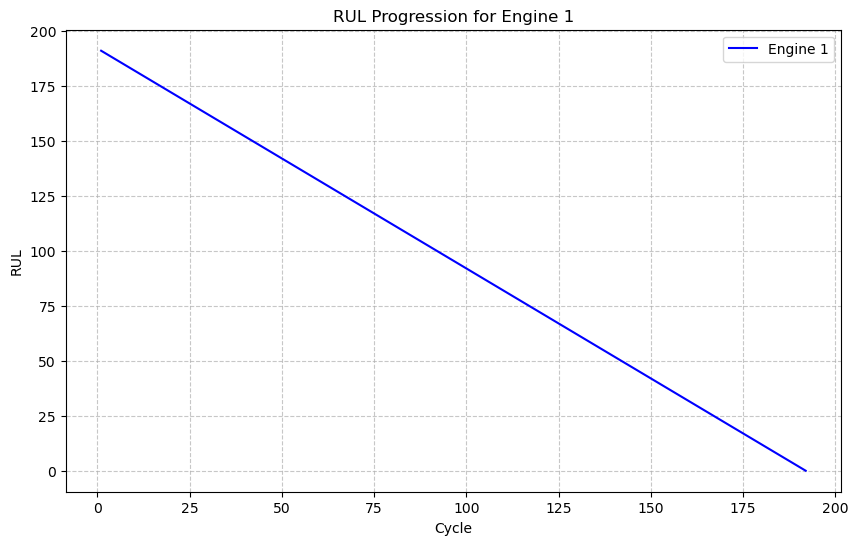

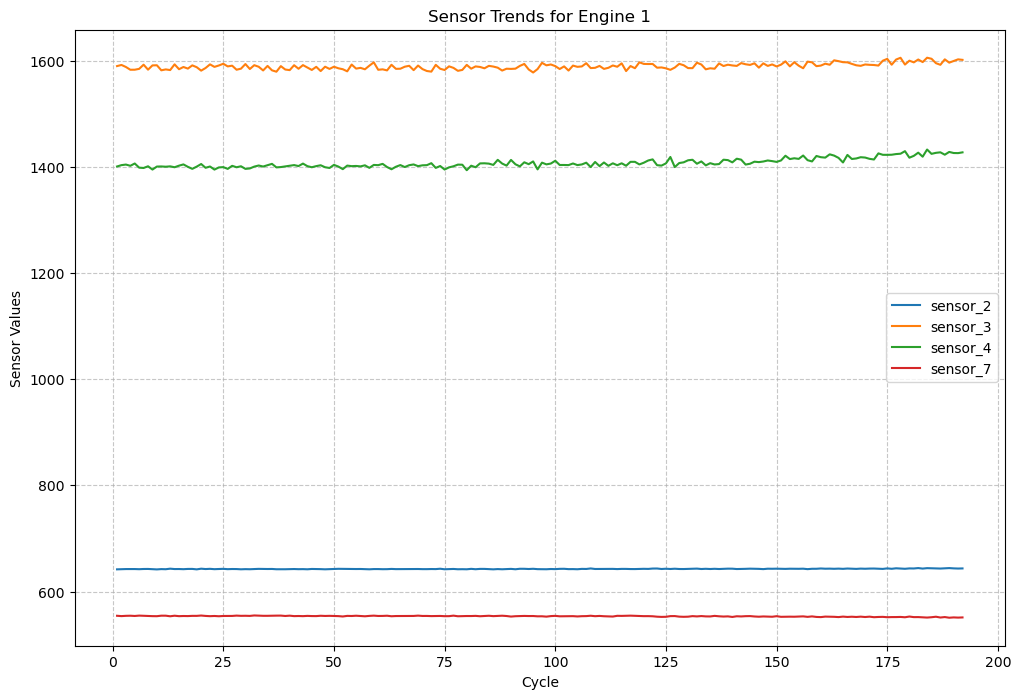

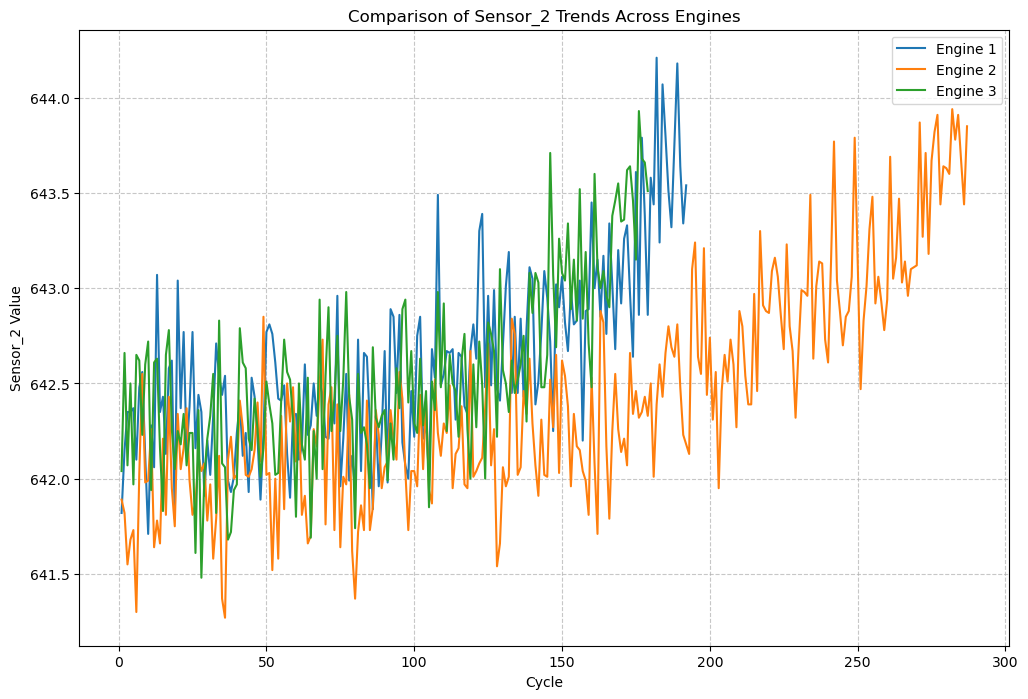

           cycle_min  cycle_max  RUL_max  sensor_2_mean  sensor_2_std  \
engine_id                                                               
1                  1        192      191     642.621042      0.486795   
2                  1        287      286     642.435226      0.560214   
3                  1        179      178     642.543743      0.474190   
4                  1        189      188     642.662381      0.441446   
5                  1        269      268     642.451970      0.551542   
...              ...        ...      ...            ...           ...   
96                 1        336      335     642.629821      0.501021   
97                 1        202      201     642.522624      0.473922   
98                 1        156      155     642.584872      0.525905   
99                 1        185      184     642.611081      0.502209   
100                1        200      199     642.741250      0.460405   

           sensor_3_mean  sensor_3_std  sensor_4_m

In [157]:
# Calculate RUL
raw_data['RUL'] = raw_data.groupby('engine_id')['cycle'].transform('max') - raw_data['cycle']

# 1. Select a single engine for detailed analysis
engine_id = 1  # Change to analyze other engines
engine_data = raw_data[raw_data['engine_id'] == engine_id]

# Plot RUL progression for the selected engine
plt.figure(figsize=(10, 6))
plt.plot(engine_data['cycle'], engine_data['RUL'], label=f'Engine {engine_id}', color='blue')
plt.title(f'RUL Progression for Engine {engine_id}')
plt.xlabel('Cycle')
plt.ylabel('RUL')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 2. Visualize sensor trends for the selected engine
selected_sensors = ['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7']  # Customize as needed
plt.figure(figsize=(12, 8))
for sensor in selected_sensors:
    plt.plot(engine_data['cycle'], engine_data[sensor], label=sensor)
plt.title(f'Sensor Trends for Engine {engine_id}')
plt.xlabel('Cycle')
plt.ylabel('Sensor Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 3. Compare sensor behavior across multiple engines
subset_engines = [1, 2, 3]  # Change to include other engines
plt.figure(figsize=(12, 8))
for eid in subset_engines:
    subset_data = raw_data[raw_data['engine_id'] == eid]
    plt.plot(subset_data['cycle'], subset_data['sensor_2'], label=f'Engine {eid}')
plt.title('Comparison of Sensor_2 Trends Across Engines')
plt.xlabel('Cycle')
plt.ylabel('Sensor_2 Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 4. Calculate summary statistics for each engine
engine_summary = raw_data.groupby('engine_id').agg({
    'cycle': ['min', 'max'],
    'RUL': 'max',
    **{sensor: ['mean', 'std'] for sensor in selected_sensors}
})
engine_summary.columns = ['_'.join(col).strip() for col in engine_summary.columns.values]
print(engine_summary)


## 10. Insights and Summary
- **Objective**: Summarize key findings from the EDA.
- **Steps**:
  - Identify which sensors and operational settings show the strongest correlations with degradation.
  - Highlight any unusual trends or anomalies.
  - List features that will be most relevant for modeling.

---

## Insights and Summary from the NASA Turbofan Engine Degradation Dataset

### Key Observations

#### 1. **Static Columns**
- Some sensors and operational settings have **static values** throughout the dataset. These include:
  - `os_3`, `sensor_1`, `sensor_5`, `sensor_10`, `sensor_16`, `sensor_18`, `sensor_19`.
- Static columns have zero variance and do not provide useful information for predicting Remaining Useful Life (RUL).
- **Action**: These columns can be safely removed from the dataset to reduce noise and dimensionality.

---

#### 2. **RUL (Remaining Useful Life) Trends**
- **RUL decreases linearly** over time (cycles) for each engine.
- At the last cycle for each engine, the RUL reaches `0`, indicating engine failure.
- There is a higher density of rows with **low RUL values**, reflecting the critical degradation phase.

---

#### 3. **Feature Relationships**
- **Strong Correlations**:
  - Some sensors show strong correlations with RUL, such as `sensor_2`, `sensor_3`, and `sensor_4`.
  - These sensors are likely valuable predictors for the model.
- **Weak Correlations**:
  - Many sensors exhibit weak or no correlation with RUL, suggesting they may not contribute significantly to predictive performance.

---

#### 4. **Engine-Specific Behavior**
- While general trends (e.g., RUL progression) are consistent across engines, **variability exists** in sensor readings between engines.
- Clustering engines based on sensor trends or operational characteristics might reveal subpopulations or distinct failure modes.

---

#### 5. **Degradation Trends**
- Certain sensors (e.g., `sensor_2`, `sensor_3`) exhibit clear **degradation trends** as engines approach failure.
- These trends can guide feature selection and engineering to improve model performance.

---

### Summary of Actions

1. **Remove Static Columns**:
   - Drop columns with no variance: `os_3`, `sensor_1`, `sensor_5`, `sensor_10`, `sensor_16`, `sensor_18`, `sensor_19`.

2. **Focus on Predictive Features**:
   - Identify features with strong correlations to RUL or meaningful degradation trends.
   - Examples: `sensor_2`, `sensor_3`, `sensor_4`.

3. **Handle Imbalance in RUL Distribution**:
   - The dataset has more rows for **low RUL values** (near failure). Consider addressing this imbalance using resampling or weighting techniques during model training.

4. **Explore Engine-Specific Variability**:
   - Investigate sensor behavior for individual engines to uncover variability and potential outliers.

5. **Engineer Features from Degradation Trends**:
   - Derive additional features (e.g., rate of change, cumulative degradation) from sensors with clear trends to enhance model performance.

---

### Insights for Model Development
- Static columns add no predictive power and should be removed during preprocessing.
- Features with clear degradation trends (e.g., `sensor_2`) are valuable for predicting RUL.
- Understanding engine-specific variability is crucial for building robust models.
- Handling RUL imbalance ensures the model performs well across all stages of engine degradation.

---


## Tools and Visualizations
- **Histograms**: For feature distributions.
- **Box Plots**: To identify outliers.
- **Heatmaps**: For correlation analysis.
- **Line Plots**: For time-series trends.
- **Scatter Plots**: To explore relationships between features.

---

This structured approach ensures a thorough understanding of the dataset and provides insights critical for subsequent feature engineering and modeling.


# Step 3: Preprocess the Data

Preprocessing the data ensures it is clean, normalized, and suitable for machine learning models. Below are the key steps for preprocessing the NASA Turbofan Engine Degradation Dataset:

---

## 1. Normalize and Scale Features
- **Objective**: Ensure all features have comparable ranges, which helps models converge faster and improves performance.
- **Steps**:
  - Normalize sensor readings to a standard range (e.g., [0, 1] or [-1, 1]).
  - Apply scaling to operational settings if needed.

---

## 2. Handle Outliers
There weren't any outliers in the dataset. We checked that in the EDA.

- **Objective**: Detect and handle extreme values that might bias the model.
- **Steps**:
  - Use domain knowledge or statistical techniques (e.g., IQR method) to identify outliers.
  - Decide on an approach:
    - Remove extreme outliers.
    - Cap values at a threshold.
    - Transform values (e.g., log transformation).

---

## 3. Compute Remaining Useful Life (RUL)
- **Objective**: Create the target variable for the training dataset.
- **Steps**:
  - Calculate `RUL` for each engine as:
    ```
    RUL = max(cycle) - current(cycle)
    ```
  - Add the `RUL` column to the training dataset.

---

## 4. Split Data into Train andd Test Sets
Splitting here is already provided by the strucutre of the dataset. We are going to create a Dataset with two modes: train and test. The data to load is provided as a parameter data_dir, the mode then defines which file to load from the physical dataset.

- **Objective**: Prepare datasets for model training and evaluation.
- **Steps**:
  - Split the training data into train and test sets.
  - Use an engine-wise split to ensure no data leakage (i.e., ensure engines in the validation set are not in the training set).
  - We are going to use **k-fold** cross validation instead of a dedicated validation dataset

---

## Notes
- **Feature Engineering**:
  - Derived features (e.g., rolling averages, deltas) can be added after basic preprocessing.
- **Time-Series Consideration**:
  - Ensure preprocessing preserves the temporal nature of the data.

This structured approach ensures the dataset is ready for feature engineering and model training.


In [3]:
import pandas as pd
from IPython.display import display

# Load the raw data
data_path = "data/CMAPSSData/train_FD001.txt"  # Update with your actual path
column_names = ['engine_id', 'cycle'] + \
               [f'os_{i+1}' for i in range(3)] + \
               [f'sensor_{i}' for i in range(1, 22)]

# Read the dataset
raw_data = pd.read_csv(data_path, sep=r"\s+", header=None, names=column_names, engine='python')

# Display the first 10 rows of the raw data
print("Displaying the first 10 rows of the raw dataset:")
display(raw_data.head(10))

Displaying the first 10 rows of the raw dataset:


engine_id  cycle    os_1    os_2   os_3  sensor_1  sensor_2  sensor_3  \
0          1      1 -0.0007 -0.0004  100.0    518.67    641.82   1589.70   
1          1      2  0.0019 -0.0003  100.0    518.67    642.15   1591.82   
2          1      3 -0.0043  0.0003  100.0    518.67    642.35   1587.99   
3          1      4  0.0007  0.0000  100.0    518.67    642.35   1582.79   
4          1      5 -0.0019 -0.0002  100.0    518.67    642.37   1582.85   
5          1      6 -0.0043 -0.0001  100.0    518.67    642.10   1584.47   
6          1      7  0.0010  0.0001  100.0    518.67    642.48   1592.32   
7          1      8 -0.0034  0.0003  100.0    518.67    642.56   1582.96   
8          1      9  0.0008  0.0001  100.0    518.67    642.12   1590.98   
9          1     10 -0.0033  0.0001  100.0    518.67    641.71   1591.24   

   sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  sensor_15  \
0   1400.60     14.62  ...     521.66    2388.02    8138.62     8.4195   
1   1403.14     14.62  ...     522.28    2388.07    8131.49     8.4318   
2   1404.20     14.62  ...     522.42    2388.03    8133.23     8.4178   
3   1401.87     14.62  ...     522.86    2388.08    8133.83     8.3682   
4   1406.22     14.62  ...     522.19    2388.04    8133.80     8.4294   
5   1398.37     14.62  ...     521.68    2388.03    8132.85     8.4108   
6   1397.77     14.62  ...     522.32    2388.03    8132.32     8.3974   
7   1400.97     14.62  ...     522.47    2388.03    8131.07     8.4076   
8   1394.80     14.62  ...     521.79    2388.05    8125.69     8.3728   
9   1400.46     14.62  ...     521.79    2388.06    8129.38     8.4286   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0       0.03        392       2388      100.0      39.06    23.4190  
1       0.03        392       2388      100.0      39.00    23.4236  
2       0.03        390       2388      100.0      38.95    23.3442  
3       0.03        392       2388      100.0      38.88    23.3739  
4       0.03        393       2388      100.0      38.90    23.4044  
5       0.03        391       2388      100.0      38.98    23.3669  
6       0.03        392       2388      100.0      39.10    23.3774  
7       0.03        391       2388      100.0      38.97    23.3106  
8       0.03        392       2388      100.0      39.05    23.4066  
9       0.03        393       2388      100.0      38.95    23.4694  

[10 rows x 26 columns]

In [4]:
constant_cols = raw_data[column_names].nunique()
constant_cols = constant_cols[constant_cols == 1]

print("Constant columns (by unique values):")
print(constant_cols.index.tolist())

Constant columns (by unique values):
['os_3', 'sensor_1', 'sensor_5', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']


In [5]:
# Watch for changes
%load_ext autoreload
%autoreload 2

from codebase.v1.dataset import CMAPSSDataset
from codebase.v1.data import ScalerTransform
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader

data_dir = "data/CMAPSSData"
feature_cols = [f'os_{i+1}' for i in range(3)] + [f'sensor_{i}' for i in range(1, 22)]

drop_constant_columns = True

if drop_constant_columns:
    feature_cols = [col for col in feature_cols if col not in constant_cols.index.tolist()]

# Instantiate the training dataset
scaler_dataset = CMAPSSDataset(data_dir=data_dir, data_index=1, feature_cols=feature_cols, mode="train")

# Prefit the scaler (for normalization and preprocessing (this excludes engine_id and cycle columns))
data = scaler_dataset.data

# constant columns
test = data[feature_cols].values
scaler = StandardScaler() # Z-score normalization
scaler.fit(data[feature_cols].values) # Fitted on 24 columns

# Define transforms with prefitted scaler
train_transform = ScalerTransform(scaler)
test_transform = ScalerTransform(scaler)

# Create datasets with transforms
train_dataset_transformed = CMAPSSDataset(
    data_dir=data_dir, data_index=1, mode="train", 
    transform=train_transform, 
    feature_cols=feature_cols)

test_dataset_transformed = CMAPSSDataset(
    data_dir=data_dir,  data_index=1, mode="test", transform=test_transform, feature_cols=feature_cols)

# Create DataLoaders
train_loader = DataLoader(train_dataset_transformed, batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset_transformed, batch_size=32, shuffle=False, num_workers=0)

print("Training dataset with transforms:")
for features, targets in train_loader:
    print("Features:", features.shape)
    print("Targets:", targets.shape)
    break

print("\nTest dataset with transforms:")
for features in test_loader:
    print("Features:", features.shape)
    break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training dataset with transforms:
Features: torch.Size([32, 17])
Targets: torch.Size([32])

Test dataset with transforms:
Features: torch.Size([32, 17])


In [6]:
import pandas as pd
from torch.utils.data import DataLoader
from IPython.display import display

# Function to test and visualize the dataset
def visualize_dataset_test(loader, num_samples, columns):
    """
    Test the dataset and visualize the normalized data in a tabular format.
    
    Args:
        dataset (Dataset): The dataset to test.
        num_samples (int): Number of samples to visualize.
    """
    # Get one batch
    for features in loader:
        # Convert features and targets to a DataFrame for visualization
        feature_df = pd.DataFrame(features.numpy(), columns=columns)

        # Display the DataFrame
        print(f"Displaying {num_samples} samples:")
        display(feature_df.head(num_samples))
        break

# Function to test and visualize the dataset
def visualize_dataset(loader, num_samples, columns):
    """
    Test the dataset and visualize the normalized data in a tabular format.
    
    Args:
        dataset (Dataset): The dataset to test.
        num_samples (int): Number of samples to visualize.
    """
    # Get one batch
    for features, targets in loader:
        # Convert features and targets to a DataFrame for visualization
        feature_df = pd.DataFrame(features.numpy(), columns=columns)
        target_df = pd.DataFrame(targets.numpy(), columns=["RUL"])
        
        # Combine features and targets
        combined_df = pd.concat([feature_df, target_df], axis=1)

        # Display the DataFrame
        print(f"Displaying {num_samples} samples:")
        display(combined_df.head(num_samples))
        break

# Normalized feature columns
print("Train Loader:")
visualize_dataset(train_loader, num_samples=5, columns=feature_cols)

print("\nTest Loader:")
visualize_dataset_test(test_loader, num_samples=5, columns=[column for column in feature_cols if column not in ("RUL")])

# Unnormalized feature columns
print("Train Loader (unscaled):")
unnormalized_train_loader = DataLoader(scaler_dataset, batch_size=32, shuffle=False, num_workers=0)
visualize_dataset(unnormalized_train_loader, num_samples=5, columns=feature_cols)

print("\nTest Loader (unscaled):")
test_dataset = CMAPSSDataset(
    data_dir=data_dir, data_index=1, mode="test", feature_cols=feature_cols)

unnormalized_test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)
visualize_dataset_test(unnormalized_test_loader, num_samples=5, columns=[column for column in feature_cols if column not in ("RUL")])


Train Loader:
Displaying 5 samples:


os_1      os_2  sensor_2  sensor_3  sensor_4  sensor_6  sensor_7  \
0 -0.315980 -1.372953 -1.721725 -0.134255 -0.925936  0.141683  1.121141   
1  0.872722 -1.031720 -1.061780  0.211528 -0.643726  0.141683  0.431930   
2 -1.961874  1.015677 -0.661813 -0.413166 -0.525953  0.141683  1.008155   
3  0.324090 -0.008022 -0.661813 -1.261314 -0.784831  0.141683  1.222827   
4 -0.864611 -0.690488 -0.621816 -1.251528 -0.301518  0.141683  0.714393   

   sensor_8  sensor_9  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0 -0.516338 -0.862813  -0.266467   0.334262  -1.058890  -0.269071  -0.603816   
1 -0.798093 -0.958818  -0.191583   1.174899  -0.363646  -0.642845  -0.275852   
2 -0.234584 -0.557139  -1.015303   1.364721  -0.919841  -0.551629  -0.649144   
3  0.188048 -0.713826  -1.539489   1.961302  -0.224597  -0.520176  -1.971665   
4 -0.516338 -0.457059  -0.977861   1.052871  -0.780793  -0.521748  -0.339845   

   sensor_17  sensor_20  sensor_21    RUL  
0  -0.781710   1.348493   1.194427  191.0  
1  -0.781710   1.016528   1.236922  190.0  
2  -2.073094   0.739891   0.503423  189.0  
3  -0.781710   0.352598   0.777792  188.0  
4  -0.136018   0.463253   1.059552  187.0


Test Loader:
Displaying 5 samples:


os_1      os_2  sensor_2  sensor_3  sensor_4  sensor_6  sensor_7  \
0  1.055599  1.015677  0.678077 -0.853550 -1.191480  0.141683  0.601408   
1 -1.230366 -1.031720 -1.941707 -0.338137 -1.501467  0.141683  1.674769   
2  0.141213  0.333211 -0.441831 -0.584426 -0.843717  0.141683  0.838677   
3  1.924266 -0.008022 -0.481827 -1.044384 -0.279297  0.141683  0.793483   
4  0.644125 -0.008022 -0.341839 -0.543650 -0.779276  0.141683  0.895170   

   sensor_8  sensor_9  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0 -0.798093 -0.682579  -1.277396   0.415614  -0.919841  -0.954235  -0.985107   
1 -1.220725 -0.490117  -0.154141   1.012195  -0.502695  -0.216648  -1.649034   
2 -0.657216 -0.375093  -0.154141   0.754581  -0.919841  -0.715712   0.052112   
3 -0.938970 -0.903570  -0.977861  -0.045381  -0.641744  -0.568929  -1.345067   
4 -1.220725 -0.937081  -0.865536   0.998637  -0.919841  -0.745069  -1.041101   

   sensor_17  sensor_20  sensor_21  
0  -0.781710   0.241943   0.774097  
1  -0.136018   1.127183   0.941305  
2  -0.136018   1.459148   1.172256  
3  -1.427402   1.016528   0.775945  
4  -2.073094   0.961200   1.138999

Train Loader (unscaled):
Displaying 5 samples:


os_1    os_2    sensor_2     sensor_3     sensor_4   sensor_6  \
0 -0.0007 -0.0004  641.820007  1589.699951  1400.599976  21.610001   
1  0.0019 -0.0003  642.150024  1591.819946  1403.140015  21.610001   
2 -0.0043  0.0003  642.349976  1587.989990  1404.199951  21.610001   
3  0.0007  0.0000  642.349976  1582.790039  1401.869995  21.610001   
4 -0.0019 -0.0002  642.369995  1582.849976  1406.219971  21.610001   

     sensor_7     sensor_8     sensor_9  sensor_11   sensor_12    sensor_13  \
0  554.359985  2388.060059  9046.190430  47.470001  521.659973  2388.020020   
1  553.750000  2388.040039  9044.070312  47.490002  522.280029  2388.070068   
2  554.260010  2388.080078  9052.940430  47.270000  522.419983  2388.030029   
3  554.450012  2388.110107  9049.480469  47.130001  522.859985  2388.080078   
4  554.000000  2388.060059  9055.150391  47.279999  522.190002  2388.040039   

     sensor_14  sensor_15  sensor_17  sensor_20  sensor_21    RUL  
0  8138.620117     8.4195      392.0  39.060001  23.419001  191.0  
1  8131.490234     8.4318      392.0  39.000000  23.423599  190.0  
2  8133.229980     8.4178      390.0  38.950001  23.344200  189.0  
3  8133.830078     8.3682      392.0  38.880001  23.373899  188.0  
4  8133.799805     8.4294      393.0  38.900002  23.404400  187.0


Test Loader (unscaled):
Displaying 5 samples:


os_1    os_2    sensor_2     sensor_3     sensor_4   sensor_6  \
0  0.0023  0.0003  643.020020  1585.290039  1398.209961  21.610001   
1 -0.0027 -0.0003  641.710022  1588.449951  1395.420044  21.610001   
2  0.0003  0.0001  642.460022  1586.939941  1401.339966  21.610001   
3  0.0042  0.0000  642.440002  1584.119995  1406.420044  21.610001   
4  0.0014  0.0000  642.510010  1587.189941  1401.920044  21.610001   

     sensor_7     sensor_8     sensor_9  sensor_11   sensor_12    sensor_13  \
0  553.900024  2388.040039  9050.169922  47.200001  521.719971  2388.030029   
1  554.849976  2388.010010  9054.419922  47.500000  522.159973  2388.060059   
2  554.109985  2388.050049  9056.959961  47.500000  521.969971  2388.030029   
3  554.070007  2388.030029  9045.290039  47.279999  521.380005  2388.050049   
4  554.159973  2388.010010  9044.549805  47.310001  522.150024  2388.030029   

     sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  
0  8125.549805     8.4052      392.0  38.860001  23.373501  
1  8139.620117     8.3803      393.0  39.020000  23.391600  
2  8130.100098     8.4441      393.0  39.080002  23.416599  
3  8132.899902     8.3917      391.0  39.000000  23.373699  
4  8129.540039     8.4031      390.0  38.990002  23.413000